### Списки

In [1]:
numbers = [1, 2, 3, 4]

numbers = numbers.append(5)

print(numbers)

None


In [2]:
letters = ['a', 'b', 'c']

letters[2:6] = ['d', 'e', 'f']

print(letters)

['a', 'b', 'd', 'e', 'f']


любая непустая коллекция приводится к логическому значению True

In [3]:
my_list = [[]]

if my_list:
    print('True')
else:
    print('False')

True


In [6]:
numbers = [1, 2, 3, 4]

numbers.extend([])
numbers

[1, 2, 3, 4]

In [7]:
numbers = [1, 2, 3, 4]
numbers.append([])
numbers


[1, 2, 3, 4, []]

In [8]:
python = ['word']

x = python in python

print(x)

False


### Словари и множества

        Дана строка соответствия латинскому алфавиту: первый символ строки соответствует букве a, второй — b, третий — c, и так далее. Каждый символ соответствует как заглавной, так и строчной буквам. Количество символов в строке совпадает с количеством букв в латинском алфавите.

        Напишите программу, которая с помощью данной строки переводит заданный текст.

In [19]:
# используем метод maketrans(), который возвращает словарь соответствия двух списков в формате {спис1[0] : спис2[0],... }

def encrypte_str(encrypted_abc, some_string):
    # создаем строку алфавита и строку зашифрованного алфавита
    eng_abc = ''.join([chr(el) for el in range(ord('a'), ord('z')+1)])  

    # считываем строку, которую хотим перевести+ меняем регистр на тот же, что и у исходного алфавита
    some_string = some_string.lower()

    # создаем таблицу соответствия зашифрованных символов - символам алфавита
    tbl = some_string.maketrans(eng_abc, encrypted_abc)

    return print(some_string.translate(tbl))

In [20]:
a = '😀😄😁😆😉😌😍🥰😘😗😙😚😋😛😝😜🤪🤨😫😩🥺😢😭😤😠😡'
b = 'Dont be so sad!'

encrypte_str(a,b)

😆😝😛😩 😄😉 😫😝 😫😀😆!


### Именованные кортежи collections namedtuple
https://stepik.org/lesson/590034/step/1?unit=584966

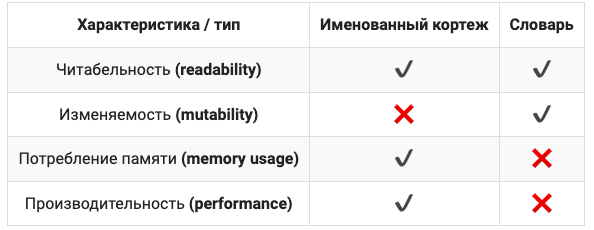

In [21]:
from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])     # объявляем тип Point именованного кортежа

point = Point(3, 7)                         # создаем именованный кортеж Point

print(point)
print(point.x, point.y)
print(point[0], point[1])
print(type(point))

Point(x=3, y=7)
3 7
3 7
<class '__main__.Point'>


namedtuple(typename, field_names, *, rename=False, defaults=None, module=None)

- Параметр typename отвечает за имя создаваемого типа (строка с типом, который нужно сделать именованным кортежем)

- параметр field_names за названия полей (список, словарь, строка, множество, кортеж)

- rename нужен, когда мы импортируем имена аргументов из какого-нибудь файла

- default для установки дефолтных значений по умолчанию для аргументов

- Параметр module был добавлен в Python 3.6 для того, чтобы появилась возможность сериализовать/десериализовать именованные кортежи с помощью модуля pickle.

In [22]:
# например, со строкой интереснее всего

from collections import namedtuple

Point = namedtuple('Point', 'x,y')     # в качестве второго параметра передаем строку
point =  Point(2, 4)
print(point)                           # выводит Point(x=2, y=4)


Point(x=2, y=4)


In [23]:
from collections import namedtuple

Point = namedtuple('Point', 'x y')    # в качестве второго параметра передаем строку
point =  Point(2, 4)
print(point)                          # выводит Point(x=2, y=4)

Point(x=2, y=4)


Допустим, мы импортируем данные из CSV-файла и превращаем каждую строку в именованный кортеж. Структура файла имеет вид:

name,surname,age,class
Timur,Guev,28,11
Ruslan,Chaniev,22,9
...
Названия полей мы берем из заголовка CSV-файла:

from collections import namedtuple

headers = ('name', 'surname', 'age', 'class')

Student = namedtuple('Student', headers)
Поскольку одно поле имеет название class (ключевое слово языка Python) мы получаем ошибку: ValueError: Type names and field names cannot be a keyword: 'class'.

Проблема заключается в том, что мы не знаем, будут ли в качестве названий полей у нас ключевые слова языка Python или нет. Для решения данной проблемы можно использовать параметр rename со значением True.

Приведенный ниже код:

from collections import namedtuple

headers = ('name', 'surname', 'age', 'class')

Student = namedtuple('Student', headers, rename=True)

stud = Student('Роман', 'Белых', 26, 10)
print(stud)
выводит:

Student(name='Роман', surname='Белых', age=26, _3=10)
Обратите внимание на то, что Python автоматически переименовал поле class в _3.

In [24]:
from collections import namedtuple

headers = ('name', 'surname', 'age', 'class', 'with', 'color', 'name', 'class', 'if')

Student = namedtuple('Student', headers, rename=True)

stud = Student('Тимур', 'Гуев', 28, 11, 'sister', 'green', 'Tim', '11A', 'else')
print(stud)

Student(name='Тимур', surname='Гуев', age=28, _3=11, _4='sister', color='green', _6='Tim', _7='11A', _8='else')


In [25]:
# параметр default для значений 
from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'], defaults=(0, 0))
point1 = Point()      # используем значения по умолчанию
point2 = Point(1, 9)

print(point1)
print(point2)

Point(x=0, y=0)
Point(x=1, y=9)


In [26]:
from collections import namedtuple

Movie = namedtuple('Movie', ['name', 'genres', 'director', 'imdb_rating'])

movie = Movie('La La Land', ['comedy', 'drama', 'musical'], 'Damien Chazelle', 8)



In [29]:
movie.name

'La La Land'

In [30]:
# итерирование по именованному кортежу

from collections import namedtuple

Weather = namedtuple('Weather', ['temp', 'wind', 'rain', 'cloud'])

tokyo_weather = Weather(11, 6, 0.0, 25)

for x in tokyo_weather:
    print(x)

11
6
0.0
25


In [31]:
from collections import namedtuple

Integer = namedtuple('Integer', ['value', 'even', 'divisors'])

number = Integer(16, True, [1, 2, 4])

number

Integer(value=16, even=True, divisors=[1, 2, 4])

Именованные кортежи имеют два дополнительных атрибута: **_fields и _field_defaults**. 

- fields содержит кортеж строк, в котором перечислены имена полей. 

- field_defaults содержит словарь, который сопоставляет имена полей с соответствующими значениями по умолчанию, если таковые имеются.

In [32]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

tim = Person('Тимур', 29, 170)

print(tim)
print(tim._fields)
print(Person._fields)

Person(name='Тимур', age=29, height=170)
('name', 'age', 'height')
('name', 'age', 'height')


С помощью атрибута _fields мы можем создавать новые именованные кортежи на основании уже существующих. В следующем примере мы создадим новый именованный кортеж с именем ExtendedPerson, который расширяет старый Person новым полем weight.

In [33]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

ExtendedPerson = namedtuple('ExtendedPerson', [*Person._fields, 'weight'])  # распаковка полей старого кортежа

timur = ExtendedPerson('Тимур', 29, 170, 65)

print(timur)
print(ExtendedPerson._fields)

ExtendedPerson(name='Тимур', age=29, height=170, weight=65)
('name', 'age', 'height', 'weight')


In [34]:
# перебор полей (имен аргументов) для именованных кортежей через zip()

from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person('Тимур', 29, 170)

for field, value in zip(Person._fields, timur):
    print(field, '->', value)

name -> Тимур
age -> 29
height -> 170


In [35]:
# field_defaults содержит словарь значений ко умолчанию (если их нет - пустой словарь)

from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height', 'country'], defaults=['Russia'])

timur = Person('Тимур', 29, 170)

print(timur)
print(timur._field_defaults)
print(Person._field_defaults)

print() 
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height', 'country'])

timur = Person('Тимур', 29, 170, 'Russia')

print(Person._field_defaults)   # выведет пустой словарь

Person(name='Тимур', age=29, height=170, country='Russia')
{'country': 'Russia'}
{'country': 'Russia'}

{}


Кортежи имеют два основных метода:
1) index (x) найдет индекс заданного элемента
2) count(x) посчитает число вхождений Х в кортеже

+ в именованных кортежах добавляются:
3) _make() используется для создания именованных кортежей из итерируемых объектов (список, кортеж, строка, словарь и т.д.).

4) _asdict() метод возвращает словарь, в котором имена полей используются в качестве ключей. Ключи результирующего словаря находятся в том же порядке, что и поля в исходном именованном кортеже

5) _replace() позволяет создавать новые именованные кортежи на основании уже существующих с заменой некоторых значений. Потребность в данном методе вызвана тем, что именованные кортежи являются неизменяемыми

In [36]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person._make(['Timur', 29, 170])

print(timur)

Person(name='Timur', age=29, height=170)


In [37]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person._make(['Timur', 29, 170])

print(timur._asdict())

{'name': 'Timur', 'age': 29, 'height': 170}


In [39]:
# изменить именованный кортеж 
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height', 'country'])

timur1 = Person('Тимур', 29, 170, 'Russia')
timur2 = timur1._replace(age=30, country='Germany')

print(timur1)
print(timur2)

Person(name='Тимур', age=29, height=170, country='Russia')
Person(name='Тимур', age=30, height=170, country='Germany')


### Задачи на namedtuple

        Вам доступен именованный кортеж Animal, который содержит данные о животном. Первым элементом именованного кортежа является имя животного, вторым — семейство, третьим — пол, четвертым — цвет. Также доступен файл data.pkl, содержащий сериализованный список таких кортежей.

        Дополните приведенный ниже код, чтобы для каждого кортежа из этого списка он вывел названия его полей и значения этих полей в следующем формате:

        name: <значение>
        family: <значение>
        sex: <значение>
        color: <значение>

In [40]:
import pickle
from collections import namedtuple
Animal = namedtuple('Animal', ['name', 'family', 'sex', 'color'])

with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/data.pkl',
           mode='rb') as file:
    animals = pickle.load(file)

animals

[Animal(name='Alex', family='dogs', sex='m', color='brown'),
 Animal(name='Nancy', family='cats', sex='w', color='white'),
 Animal(name='Sam', family='dogs', sex='m', color='brown'),
 Animal(name='Misha', family='hedgehogs', sex='m', color='black'),
 Animal(name='Fredd', family='cats', sex='m', color='white'),
 Animal(name='Python', family='snakes', sex='w', color='white'),
 Animal(name='Crispy', family='cats', sex='w', color='white'),
 Animal(name='Adam', family='hedgehogs', sex='m', color='black'),
 Animal(name='Daddy', family='snakes', sex='m', color='brown'),
 Animal(name='Mickey', family='hedgehogs', sex='m', color='brown'),
 Animal(name='Tom', family='cats', sex='m', color='white'),
 Animal(name='Jerry', family='snakes', sex='m', color='brown'),
 Animal(name='Chip', family='hedgehogs', sex='m', color='white')]

In [71]:
def unpack_dict(smdct):
    return [f'{item[0]}: {item[1]}' for item in smdct.items()]

In [81]:
unpacked_animals = [unpack_dict(animal._asdict()) for animal in animals]
for animal in unpacked_animals:
    print(*animal, sep='\n')
    print()

name: Alex
family: dogs
sex: m
color: brown

name: Nancy
family: cats
sex: w
color: white

name: Sam
family: dogs
sex: m
color: brown

name: Misha
family: hedgehogs
sex: m
color: black

name: Fredd
family: cats
sex: m
color: white

name: Python
family: snakes
sex: w
color: white

name: Crispy
family: cats
sex: w
color: white

name: Adam
family: hedgehogs
sex: m
color: black

name: Daddy
family: snakes
sex: m
color: brown

name: Mickey
family: hedgehogs
sex: m
color: brown

name: Tom
family: cats
sex: m
color: white

name: Jerry
family: snakes
sex: m
color: brown

name: Chip
family: hedgehogs
sex: m
color: white



        Вам доступен именованный кортеж User, который содержит данные о пользователе некоторого ресурса. Первым элементом именованного кортежа является имя пользователя, вторым — фамилия, третьим — адрес электронной почты, четвертым — статус оформленной подписки. Также доступен список users, содержащий эти кортежи.

        Дополните приведенный ниже код, чтобы он вывел данные о каждом пользователе из этого списка, предварительно отсортировав их по статусу подписки от дорогой к дешевой, а при совпадении статусов — в лексикографическом порядке адресов электронных почт. Данные о каждом пользователе должны быть указаны в следующем формате:

        <имя> <фамилия>
        Email: <адрес электронной почты>
        Plan: <статус подписки>
        Между данными двух разных пользователей должна располагаться пустая строка.

In [87]:
from collections import namedtuple

User = namedtuple('User', ['name', 'surname', 'email', 'plan'])

users = [User('Mary', 'Griffin', 'sonnen@yahoo.com', 'Basic'),
         User('Brenda', 'Young', 'retoh@outlook.com', 'Silver'),
         User('Kathleen', 'Lyons', 'balchen@att.net', 'Gold'),
         User('Pamela', 'Hicks', 'corrada@sbcglobal.net', 'Silver'),
         User('William', 'Townsend', 'kosact@verizon.net', 'Gold'),
         User('Clayton', 'Morris', 'berserk@yahoo.com', 'Silver'),
         User('Dorothy', 'Dennis', 'sequin@live.com', 'Gold'),
         User('Tyler', 'Walker', 'noahb@comcast.net', 'Basic'),
         User('Joseph', 'Moore', 'ylchang@sbcglobal.net', 'Silver'),
         User('Kenneth', 'Richardson', 'tbusch@me.com', 'Bronze'),
         User('Stephanie', 'Bush', 'neuffer@live.com', 'Gold'),
         User('Gregory', 'Hughes', 'juliano@att.net', 'Basic'),
         User('Tracy', 'Wallace', 'sblack@me.com', 'Silver'),
         User('Russell', 'Smith', 'isaacson@comcast.net', 'Bronze'),
         User('Megan', 'Patterson', 'hoangle@outlook.com', 'Basic')]

# вытащим только значения именованных кортежей

unpacked_users = [list(user._asdict().values()) for user in users]

unpacked_users

[['Mary', 'Griffin', 'sonnen@yahoo.com', 'Basic'],
 ['Brenda', 'Young', 'retoh@outlook.com', 'Silver'],
 ['Kathleen', 'Lyons', 'balchen@att.net', 'Gold'],
 ['Pamela', 'Hicks', 'corrada@sbcglobal.net', 'Silver'],
 ['William', 'Townsend', 'kosact@verizon.net', 'Gold'],
 ['Clayton', 'Morris', 'berserk@yahoo.com', 'Silver'],
 ['Dorothy', 'Dennis', 'sequin@live.com', 'Gold'],
 ['Tyler', 'Walker', 'noahb@comcast.net', 'Basic'],
 ['Joseph', 'Moore', 'ylchang@sbcglobal.net', 'Silver'],
 ['Kenneth', 'Richardson', 'tbusch@me.com', 'Bronze'],
 ['Stephanie', 'Bush', 'neuffer@live.com', 'Gold'],
 ['Gregory', 'Hughes', 'juliano@att.net', 'Basic'],
 ['Tracy', 'Wallace', 'sblack@me.com', 'Silver'],
 ['Russell', 'Smith', 'isaacson@comcast.net', 'Bronze'],
 ['Megan', 'Patterson', 'hoangle@outlook.com', 'Basic']]

In [83]:
status_dict = {'Gold':1, 'Silver':2, 'Bronze':3, 'Basic':4}

In [89]:
# сортировка список списков по двум ключам (статус и имя почты)
for user in sorted(unpacked_users, key= lambda x: [status_dict.get(x[3]), x[2]]):
    print(f'{user[0]} {user[1]}')
    print(f'  Email: {user[2]}')
    print(f'  Plan: {user[3]}')
    print()

Kathleen Lyons
  Email: balchen@att.net
  Plan: Gold

William Townsend
  Email: kosact@verizon.net
  Plan: Gold

Stephanie Bush
  Email: neuffer@live.com
  Plan: Gold

Dorothy Dennis
  Email: sequin@live.com
  Plan: Gold

Clayton Morris
  Email: berserk@yahoo.com
  Plan: Silver

Pamela Hicks
  Email: corrada@sbcglobal.net
  Plan: Silver

Brenda Young
  Email: retoh@outlook.com
  Plan: Silver

Tracy Wallace
  Email: sblack@me.com
  Plan: Silver

Joseph Moore
  Email: ylchang@sbcglobal.net
  Plan: Silver

Russell Smith
  Email: isaacson@comcast.net
  Plan: Bronze

Kenneth Richardson
  Email: tbusch@me.com
  Plan: Bronze

Megan Patterson
  Email: hoangle@outlook.com
  Plan: Basic

Gregory Hughes
  Email: juliano@att.net
  Plan: Basic

Tyler Walker
  Email: noahb@comcast.net
  Plan: Basic

Mary Griffin
  Email: sonnen@yahoo.com
  Plan: Basic



Попробуем другое решение

In [101]:
from collections import namedtuple

User = namedtuple('User', ['name', 'surname', 'email', 'plan'])

users = [User('Mary', 'Griffin', 'sonnen@yahoo.com', 'Basic'),
         User('Brenda', 'Young', 'retoh@outlook.com', 'Silver'),
         User('Kathleen', 'Lyons', 'balchen@att.net', 'Gold'),
         User('Pamela', 'Hicks', 'corrada@sbcglobal.net', 'Silver'),
         User('William', 'Townsend', 'kosact@verizon.net', 'Gold'),
         User('Clayton', 'Morris', 'berserk@yahoo.com', 'Silver'),
         User('Dorothy', 'Dennis', 'sequin@live.com', 'Gold'),
         User('Tyler', 'Walker', 'noahb@comcast.net', 'Basic'),
         User('Joseph', 'Moore', 'ylchang@sbcglobal.net', 'Silver'),
         User('Kenneth', 'Richardson', 'tbusch@me.com', 'Bronze'),
         User('Stephanie', 'Bush', 'neuffer@live.com', 'Gold'),
         User('Gregory', 'Hughes', 'juliano@att.net', 'Basic'),
         User('Tracy', 'Wallace', 'sblack@me.com', 'Silver'),
         User('Russell', 'Smith', 'isaacson@comcast.net', 'Bronze'),
         User('Megan', 'Patterson', 'hoangle@outlook.com', 'Basic')]

# сортируем сразу же список именованных кортежи (удобнее)
sorted_users = sorted(users, key=lambda x: (('Gold', 'Silver', 'Bronze', 'Basic').index(x.plan), x.email))

for user in sorted_users:
    print(f'{user.name} {user.surname}')
    print(f'  {user._fields[2].capitalize()}: {user.email}')
    print(f'  {user._fields[3].capitalize()}: {user.plan}')
    print()

Kathleen Lyons
  Email: balchen@att.net
  Plan: Gold

William Townsend
  Email: kosact@verizon.net
  Plan: Gold

Stephanie Bush
  Email: neuffer@live.com
  Plan: Gold

Dorothy Dennis
  Email: sequin@live.com
  Plan: Gold

Clayton Morris
  Email: berserk@yahoo.com
  Plan: Silver

Pamela Hicks
  Email: corrada@sbcglobal.net
  Plan: Silver

Brenda Young
  Email: retoh@outlook.com
  Plan: Silver

Tracy Wallace
  Email: sblack@me.com
  Plan: Silver

Joseph Moore
  Email: ylchang@sbcglobal.net
  Plan: Silver

Russell Smith
  Email: isaacson@comcast.net
  Plan: Bronze

Kenneth Richardson
  Email: tbusch@me.com
  Plan: Bronze

Megan Patterson
  Email: hoangle@outlook.com
  Plan: Basic

Gregory Hughes
  Email: juliano@att.net
  Plan: Basic

Tyler Walker
  Email: noahb@comcast.net
  Plan: Basic

Mary Griffin
  Email: sonnen@yahoo.com
  Plan: Basic



печать f-строки f-string - используй экранирование тремя кавычками!

In [100]:
# печать f-строки сразу в удобном виде переноса со строки на строку!!
"""
print(f'''{name} {surname}
  Email: {email}
  Plan: {plan}\n''') """

Kathleen Lyons
  Email: balchen@att.net
  Plan: Gold

William Townsend
  Email: kosact@verizon.net
  Plan: Gold

Stephanie Bush
  Email: neuffer@live.com
  Plan: Gold

Dorothy Dennis
  Email: sequin@live.com
  Plan: Gold

Clayton Morris
  Email: berserk@yahoo.com
  Plan: Silver

Pamela Hicks
  Email: corrada@sbcglobal.net
  Plan: Silver

Brenda Young
  Email: retoh@outlook.com
  Plan: Silver

Tracy Wallace
  Email: sblack@me.com
  Plan: Silver

Joseph Moore
  Email: ylchang@sbcglobal.net
  Plan: Silver

Russell Smith
  Email: isaacson@comcast.net
  Plan: Bronze

Kenneth Richardson
  Email: tbusch@me.com
  Plan: Bronze

Megan Patterson
  Email: hoangle@outlook.com
  Plan: Basic

Gregory Hughes
  Email: juliano@att.net
  Plan: Basic

Tyler Walker
  Email: noahb@comcast.net
  Plan: Basic

Mary Griffin
  Email: sonnen@yahoo.com
  Plan: Basic



        Вам доступен этот файл, имеющий название meetings.csv, в котором в первом столбце записана фамилия, во втором — имя, в третьем — дата в формате DD.MM.YYYY , в четвертом — время в формате HH:MM

        Напишите программу, которая выводит фамилии и имена друзей Тимура, предварительно отсортировав их по дате и времени встречи от самой ранней до самой поздней. Фамилии и имена должны быть расположены каждые на отдельной строке.

In [1]:
import pandas as pd
from collections import namedtuple

friends_df = pd.read_csv('https://stepik.org/media/attachments/lesson/740203/meetings.csv')
friends_df

,surname,name,meeting_date,meeting_time
0,Харисов,Артур,15.07.2022,17:00
1,Гагиев,Геор,14.12.2022,18:00
2,Дедегкаев,Дамир,12.8.2023,11:30
3,Кодзаев,Георгий,07.08.2023,13:30
4,Набокова,Алиса,29.09.2022,15:00
5,Кораев,Артур,08.09.2023,17:00
6,Шилин,Александр,23.12.2023,11:00
7,Уртаева,Илина,03.09.2022,07:30
8,Салбиев,Максим,11.10.2023,21:30
9,Капустин,Егор,29.10.2023,19:30


In [14]:
friends_df['time'] = friends_df.meeting_date + ' ' + friends_df.meeting_time
friends_df['meeting'] = pd.to_datetime(friends_df.time, format= '%d.%m.%Y %H:%M')

sorted_friends = friends_df.drop(['meeting_date', 'meeting_time', 'time'], axis=1)\
    .sort_values('meeting')

for ind, row in sorted_friends.iterrows():
    print(f'{row.surname} {row["name"]}')

Гудцев Таймураз
Харисов Артур
Базиев Герман
Макоев Руслан
Найфонов Сослан
Короев Аслан
Дедегкаев Давид
Уртаева Илина
Бекузарова Фатима
Акоева Лера
Белов Глеб
Букулова Диана
Гусейнова Марьям
Набокова Алиса
Чередник Марк
Перчиков Максим
Идрисов Баграт
Абаев Михаил
Елькина Мария
Кораев Давид
Акоева Амина
Денисов Тимофей
Алдатов Сармат
Зеленчук Александра
Тарасов Станислав
Гапбаев Герман
Рыжая Ярослава
Джикаев Таму
Балаболка Вероника
Гагиев Геор
Козаев Роберт
Габараев Артур
Юлдашев Хандамир
Кодзаев Георгий
Дедегкаев Дамир
Момотов Владислав
Щербак Юрий
Чуприков Максим
Тиникашвили Давид
Кораев Артур
Цивинская Анна
Солдатенков Илья
Туткевич Юрий
Маилян Кирилл
Джиоева Марина
Салбиев Максим
Чен Владимир
Капустин Егор
Туаллагов Давид
Губаев Герман
Кузнецов Станислав
Албегов Хетаг
Битиев Сослан
Мусиков Андраник
Уртаева Дзера
Гадзиев Георгий
Епхиева Алика
Шилин Александр


### defaultdict Словари 
https://stepik.org/lesson/590035/step/1?unit=584967

**Тип defaultdict работает быстрее чем использование методов setdefault() и get() обычного словаря (тип dict).**

In [15]:
# как обратиться к словарю по несуществующему ключу?

from collections import defaultdict

info = defaultdict(int)       # создаем словарь со значением по умолчанию 0

info['name'] = 'Timur'
info['age'] = 29
info['job'] = 'Teacher'

print(info['salary'])
print(info)

0
defaultdict(<class 'int'>, {'name': 'Timur', 'age': 29, 'job': 'Teacher', 'salary': 0})


такое обращение к словарю типа defaultdict вернет значение по умолчанию (0)

Функция defaultdict() принимает в качестве аргумента тип элемента по умолчанию. Таким образом, для ключей, к которым происходит обращение, словарь defaultdict поставит в соответствие дефолтный элемент данного типа:

        для int – число 0
        для float – число 0.0
        для bool – значение False
        для str – пустая строка ''
        для list – пустой список []
        для tuple – пустой кортеж ()
        для set – пустое множество set()
        для dict – пустой словарь {}

In [17]:
# вторым аргументом можно передать и словарь, на основе которого будет создан наш дефолт-словарь

from collections import defaultdict

info = defaultdict(int, {'name': 'Timur', 'age': 29, 'job': 'Teacher'})

print(info['name'])
print(info['salary'])
print(info)

Timur
0
defaultdict(<class 'int'>, {'name': 'Timur', 'age': 29, 'job': 'Teacher', 'salary': 0})


In [18]:
# создание словарей через именованные аргументы и через кортежи
from collections import defaultdict

info1 = defaultdict(int, name='Timur', age=29, job='Teacher')
info2 = defaultdict(int, [('name', 'Timur'), ('age', 29), ('job', 'Teacher')])

print(info1)
print(info2)

defaultdict(<class 'int'>, {'name': 'Timur', 'age': 29, 'job': 'Teacher'})
defaultdict(<class 'int'>, {'name': 'Timur', 'age': 29, 'job': 'Teacher'})


Посчитать количество вхождений элемента в списке двумя способами

In [19]:
numbers = [9, 8, 32, 1, 10, 1, 10, 23, 1, 4, 10, 4, 2, 2, 2, 2, 1, 10, 1, 2, 2, 32, 23, 23]

result = {}
for num in numbers:
    result[num] = result.get(num, 0) + 1

In [20]:
from collections import defaultdict

numbers = [9, 8, 32, 1, 10, 1, 10, 23, 1, 4, 10, 4, 2, 2, 2, 2, 1, 10, 1, 2, 2, 32, 23, 23]
result = defaultdict(int)

for num in numbers:
    result[num] += 1

Тип данных defaultdict часто используют в связке с пустым списком в качестве значения по умолчанию, чтобы начинать добавление элементов без лишнего кода.

In [22]:
from collections import defaultdict

my_dict = defaultdict(list)

for i in range(7):
    my_dict[i].append(i)

for key in my_dict:
    print(key, my_dict[key])

print(my_dict)

0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
defaultdict(<class 'list'>, {0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6]})


когда удобно использовать defaultdict, вместо dict:

        Если ваш код в значительной степени основан на словарях и вы все время имеете дело с отсутствующими ключами, вам следует подумать об использовании defaultdict, а не обычного dict

        Если элементы вашего словаря необходимо инициализировать некоторым значением по умолчанию, вам следует подумать об использовании defaultdict, вместо dict
        
        Если ваш код использует словари для агрегирования, накопления, подсчета или группировки значений, вам следует подумать об использовании defaultdict, вместо dict

Примечание. При создании defaultdict словаря можно указывать не только тип данных для значений по умолчанию, но и любую функцию, не принимающую аргументов и возвращающую некоторое дефолтное значение.

In [23]:
from collections import defaultdict

info = defaultdict(lambda: '1000000$', {'name': 'Timur', 'age': 29, 'job': 'Teacher'})

print(info['name'])
print(info['salary'])

Timur
1000000$


Примечание . Функцию, которая возвращает значение по умолчанию для отсутствующих ключей, можно явно менять через атрибут default_factory.

In [25]:
from collections import defaultdict

data = defaultdict(int)
print(data['salary1'])

data.default_factory = list
print(data['salary2'])

data.default_factory = float
print(data['salary3'])

0
[]
0.0


In [26]:
defaultdict(int, name='Timur', surname='Guev', hobby='math')


defaultdict(int, {'name': 'Timur', 'surname': 'Guev', 'hobby': 'math'})

In [27]:

defaultdict(name='Timur', surname='Guev', hobby='math')



defaultdict(None, {'name': 'Timur', 'surname': 'Guev', 'hobby': 'math'})

In [28]:
defaultdict(int, {'name': 'Timur', 'surname': 'Guev', 'hobby': 'math'})


defaultdict(int, {'name': 'Timur', 'surname': 'Guev', 'hobby': 'math'})

In [29]:
defaultdict()


defaultdict(None, {})

In [30]:
defaultdict(list)


defaultdict(list, {})

In [31]:
defaultdict(int, [('name', 'Timur'), ('surname', 'Guev'), ('hobby', 'math')])


defaultdict(int, {'name': 'Timur', 'surname': 'Guev', 'hobby': 'math'})

In [32]:
defaultdict({'name': 'Timur', 'surname': 'Guev', 'hobby': 'math'})


TypeError: first argument must be callable or None

In [33]:
defaultdict(None)


defaultdict(None, {})

In [34]:
defaultdict.fromkeys(['name', 'surname', 'hobby'], None)

defaultdict(None, {'name': None, 'surname': None, 'hobby': None})

### Задачи на defaultdict

        Первым элементом кортежа является название продукта, вторым — прибыль в долларах.

        Дополните приведенный ниже код, чтобы он определил, какой общий доход принес каждый продукт и вывел названия всех продуктов, указав для каждого соответствующую общую прибыль. Продукты должны быть расположены в лексикографическом порядке, каждый на отдельной строке, в следующем формате:

        <продукт>: $<общая прибыль>

In [36]:
from collections import defaultdict

data = [('Books', 1343), ('Books', 1166), ('Merch', 616), ('Courses', 966), ('Merch', 1145), ('Courses', 1061), 
        ('Books', 848), ('Courses', 964), ('Tutorials', 832), ('Merch', 642), ('Books', 815), ('Tutorials', 1041), 
        ('Books', 1218), ('Tutorials', 880), ('Books', 1003), ('Merch', 951), ('Books', 920), ('Merch', 729), 
        ('Tutorials', 977), ('Books', 656)]

profit = defaultdict(list)
for product in data:
    profit[product[0]].append(product[1])

print(profit)

for key in sorted(profit.keys()):
    print(f'{key}: ${sum(profit[key])}')

defaultdict(<class 'list'>, {'Books': [1343, 1166, 848, 815, 1218, 1003, 920, 656], 'Merch': [616, 1145, 642, 951, 729], 'Courses': [966, 1061, 964], 'Tutorials': [832, 1041, 880, 977]})
Books: $7969
Courses: $2991
Merch: $4083
Tutorials: $3730


        Вам доступен список кортежей staff с данными о сотрудниках некоторой компании. Первым элементом кортежа является название отдела, вторым — имя и фамилия сотрудника, работающего в этом отделе.

        Дополните приведенный ниже код, чтобы он определил, какое число сотрудников работает в каждом отделе и вывел названия всех отделов, указав для каждого соответствующее количество сотрудников. Отделы должны быть расположены в лексикографическом порядке, каждый на отдельной строке, в следующем формате:

        <отдел>: <количество сотрудников>

In [38]:
from collections import defaultdict

staff = [('Sales', 'Robert Barnes'), ('Developing', 'Thomas Porter'), ('Accounting', 'James Wilkins'), ('Sales', 'Connie Reid'), ('Accounting', 'Brenda Davis'), ('Developing', 'Miguel Norris'), ('Accounting', 'Linda Hudson'), ('Developing', 'Deborah George'), ('Developing', 'Nicole Watts'), ('Marketing', 'Billy Lloyd'), ('Sales', 'Charlotte Cox'), ('Marketing', 'Bernice Ramos'), ('Sales', 'Jose Taylor'), ('Sales', 'Katie Warner'), ('Accounting', 'Steven Diaz'), ('Accounting', 'Kimberly Reynolds'), ('Accounting', 'John Watts'), ('Accounting', 'Dale Houston'), ('Developing', 'Arlene Gibson'), ('Marketing', 'Joyce Lawrence'), ('Accounting', 'Rosemary Garcia'), ('Marketing', 'Ralph Morgan'), ('Marketing', 'Sam Davis'), ('Marketing', 'Gail Hill'), ('Accounting', 'Michelle Wright'), ('Accounting', 'Casey Jenkins'), ('Sales', 'Evelyn Martin'), ('Accounting', 'Aaron Ferguson'), ('Marketing', 'Andrew Clark'), ('Marketing', 'John Gonzalez'), ('Developing', 'Wilma Woods'), ('Sales', 'Marie Cooper'), ('Accounting', 'Kay Scott'), ('Sales', 'Gladys Taylor'), ('Accounting', 'Ann Bell'), ('Accounting', 'Craig Wood'), ('Accounting', 'Gloria Higgins'), ('Marketing', 'Mario Reynolds'), ('Marketing', 'Helen Taylor'), ('Marketing', 'Mary King'), ('Accounting', 'Jane Jackson'), ('Marketing', 'Carol Peters'), ('Sales', 'Alicia Mendoza'), ('Accounting', 'Edna Cunningham'), ('Developing', 'Joyce Rivera'), ('Sales', 'Joseph Lee'), ('Sales', 'John White'), ('Marketing', 'Charles Bailey'), ('Sales', 'Chester Fernandez'), ('Sales', 'John Washington')]

count_staff = defaultdict(list)
for emp in staff:
    count_staff[emp[0]].append(emp[1])

print(count_staff)

for key in sorted(count_staff.keys()):
    print(f'{key}: {len(count_staff[key])}')




defaultdict(<class 'list'>, {'Sales': ['Robert Barnes', 'Connie Reid', 'Charlotte Cox', 'Jose Taylor', 'Katie Warner', 'Evelyn Martin', 'Marie Cooper', 'Gladys Taylor', 'Alicia Mendoza', 'Joseph Lee', 'John White', 'Chester Fernandez', 'John Washington'], 'Developing': ['Thomas Porter', 'Miguel Norris', 'Deborah George', 'Nicole Watts', 'Arlene Gibson', 'Wilma Woods', 'Joyce Rivera'], 'Accounting': ['James Wilkins', 'Brenda Davis', 'Linda Hudson', 'Steven Diaz', 'Kimberly Reynolds', 'John Watts', 'Dale Houston', 'Rosemary Garcia', 'Michelle Wright', 'Casey Jenkins', 'Aaron Ferguson', 'Kay Scott', 'Ann Bell', 'Craig Wood', 'Gloria Higgins', 'Jane Jackson', 'Edna Cunningham'], 'Marketing': ['Billy Lloyd', 'Bernice Ramos', 'Joyce Lawrence', 'Ralph Morgan', 'Sam Davis', 'Gail Hill', 'Andrew Clark', 'John Gonzalez', 'Mario Reynolds', 'Helen Taylor', 'Mary King', 'Carol Peters', 'Charles Bailey']})
Accounting: 17
Developing: 7
Marketing: 13
Sales: 13


        Вам доступен список кортежей staff_broken с данными о сотрудниках некоторой компании. Первым элементом кортежа является название отдела, вторым — имя и фамилия сотрудника, работающего в этом отделе. Некоторые сотрудники могут встречаться в списке несколько раз.

        Дополните приведенный ниже код, чтобы он сгруппировал сотрудников по соответствующим отделам и вывел названия всех отделов, указав для каждого имена и фамилии его сотрудников. Отделы, а также имена и фамилии сотрудников в этих отделах, должны быть расположены в лексикографическом порядке, каждый на отдельной строке, в следующем формате:

        <отдел>: <имя> <фамилия>, <имя> <фамилия>, ...

In [40]:
from collections import defaultdict

staff_broken = [('Developing', 'Miguel Norris'), ('Sales', 'Connie Reid'), ('Sales', 'Joseph Lee'), ('Marketing', 'Carol Peters'), ('Accounting', 'Linda Hudson'), ('Accounting', 'Ann Bell'), ('Marketing', 'Ralph Morgan'), ('Accounting', 'Gloria Higgins'), ('Developing', 'Wilma Woods'), ('Developing', 'Wilma Woods'), ('Marketing', 'Bernice Ramos'), ('Marketing', 'Joyce Lawrence'), ('Accounting', 'Craig Wood'), ('Developing', 'Nicole Watts'), ('Sales', 'Jose Taylor'), ('Accounting', 'Linda Hudson'), ('Accounting', 'Edna Cunningham'), ('Sales', 'Jose Taylor'), ('Marketing', 'Helen Taylor'), ('Accounting', 'Kimberly Reynolds'), ('Marketing', 'Mary King'), ('Sales', 'Joseph Lee'), ('Accounting', 'Gloria Higgins'), ('Marketing', 'Andrew Clark'), ('Accounting', 'John Watts'), ('Accounting', 'Rosemary Garcia'), ('Accounting', 'Steven Diaz'), ('Marketing', 'Mary King'), ('Sales', 'Gladys Taylor'), ('Developing', 'Thomas Porter'), ('Accounting', 'Brenda Davis'), ('Sales', 'Connie Reid'), ('Sales', 'Alicia Mendoza'), ('Marketing', 'Mario Reynolds'), ('Sales', 'John White'), ('Developing', 'Joyce Rivera'), ('Accounting', 'Steven Diaz'), ('Developing', 'Arlene Gibson'), ('Sales', 'Robert Barnes'), ('Sales', 'Charlotte Cox'), ('Accounting', 'Craig Wood'), ('Marketing', 'Carol Peters'), ('Marketing', 'Ralph Morgan'), ('Accounting', 'Kay Scott'), ('Sales', 'Evelyn Martin'), ('Marketing', 'Billy Lloyd'), ('Sales', 'Gladys Taylor'), ('Developing', 'Deborah George'), ('Sales', 'Charlotte Cox'), ('Marketing', 'Sam Davis'), ('Sales', 'John White'), ('Sales', 'Marie Cooper'), ('Marketing', 'John Gonzalez'), ('Sales', 'John Washington'), ('Sales', 'Chester Fernandez'), ('Sales', 'Alicia Mendoza'), ('Sales', 'Katie Warner'), ('Accounting', 'Jane Jackson'), ('Sales', 'Chester Fernandez'), ('Marketing', 'Charles Bailey'), ('Marketing', 'Gail Hill'), ('Accounting', 'Casey Jenkins'), ('Accounting', 'James Wilkins'), ('Accounting', 'Casey Jenkins'), ('Marketing', 'Mario Reynolds'), ('Accounting', 'Aaron Ferguson'), ('Accounting', 'Kimberly Reynolds'), ('Sales', 'Robert Barnes'), ('Accounting', 'Aaron Ferguson'), ('Accounting', 'Jane Jackson'), ('Developing', 'Deborah George'), ('Accounting', 'Michelle Wright'), ('Accounting', 'Dale Houston')]

staff_dict = defaultdict(list)
for emp in staff_broken:
    staff_dict[emp[0]].append(emp[1])

print(staff_dict)

for key in sorted(staff_dict.keys()):
    print(f'{key}: {", ".join(sorted(set(staff_dict[key])))}')




defaultdict(<class 'list'>, {'Developing': ['Miguel Norris', 'Wilma Woods', 'Wilma Woods', 'Nicole Watts', 'Thomas Porter', 'Joyce Rivera', 'Arlene Gibson', 'Deborah George', 'Deborah George'], 'Sales': ['Connie Reid', 'Joseph Lee', 'Jose Taylor', 'Jose Taylor', 'Joseph Lee', 'Gladys Taylor', 'Connie Reid', 'Alicia Mendoza', 'John White', 'Robert Barnes', 'Charlotte Cox', 'Evelyn Martin', 'Gladys Taylor', 'Charlotte Cox', 'John White', 'Marie Cooper', 'John Washington', 'Chester Fernandez', 'Alicia Mendoza', 'Katie Warner', 'Chester Fernandez', 'Robert Barnes'], 'Marketing': ['Carol Peters', 'Ralph Morgan', 'Bernice Ramos', 'Joyce Lawrence', 'Helen Taylor', 'Mary King', 'Andrew Clark', 'Mary King', 'Mario Reynolds', 'Carol Peters', 'Ralph Morgan', 'Billy Lloyd', 'Sam Davis', 'John Gonzalez', 'Charles Bailey', 'Gail Hill', 'Mario Reynolds'], 'Accounting': ['Linda Hudson', 'Ann Bell', 'Gloria Higgins', 'Craig Wood', 'Linda Hudson', 'Edna Cunningham', 'Kimberly Reynolds', 'Gloria Higgins'

        Функция wins()
        В онлайн-школе BEEGEEK каждое лето проходят соревнования по шахматам, во время которых ведется статистика побед и поражений. Каждая партия описывается кортежем из двух элементов, где первый элемент — имя победившего ученика, второй элемент — имя проигравшего ученика.

        Реализуйте функцию wins(), которая принимает один аргумент:

        pairs — итерируемый объект, элементами которого являются кортежи, каждый из которых представляет собой пару имён победитель-проигравший
        Функция должна возвращать словарь, в котором ключом служит имя ученика, а значением — множество (тип set) имен учеников, которых он победил.

In [41]:
def wins(pairs):
    from collections import defaultdict
    pairs_dict = defaultdict(set)
    for plr in pairs:
        pairs_dict[plr[0]].add(plr[1])
    return pairs_dict

result = wins([('Тимур', 'Артур'), ('Тимур', 'Дима'), ('Дима', 'Артур')])

for winner, losers in sorted(result.items()):
    print(winner, '->', *sorted(losers))

Дима -> Артур
Тимур -> Артур Дима


        Функция flip_dict()
        Рассмотрим следующий словарь:

        {'a': [1, 2], 'b': [3, 1], 'c': [2]}
        «Перевернем» его, представив ключи в виде значений, а значения — в виде ключей:

        {1: ['a', 'b'], 2: ['a', 'c'], 3: ['b']}
        Реализуйте функцию flip_dict(), которая принимает один аргумент:

        dict_of_lists — словарь, в котором ключом является число или строка, а значением — список чисел или строк
        Функция должна возвращать новый словарь (тип defaultdict с типом list в качестве значения по умолчанию), который представляет собой «перевернутый» словарь dict_of_lists.

        Примечание 1. Ключи в возвращаемом функцией словаре, а также элементы в списках должны располагаться в своем исходном порядке.

In [50]:
def flip_dict1(dict_of_lists):
    from collections import defaultdict
    from functools import reduce
    temp = reduce(lambda a,b: a+b, dict_of_lists.values())
    
    res = []
    for el in temp:
        if el in res: continue
        else: res.append(el)

    sm_dict = defaultdict(list)
    for el in res:
        for key in dict_of_lists:
            if el in dict_of_lists[key]:
                sm_dict[el].append(key)
    
    return sm_dict

data = {'Arthur': ['cacao', 'tea', 'juice'], 'Timur': ['coffee', 'tea', 'juice'], 'Anri': ['juice', 'coffee']}

for key, values in flip_dict1(data).items():
    print(f'{key}: {", ".join(values)}')
    

cacao: Arthur
tea: Arthur, Timur
juice: Arthur, Timur, Anri
coffee: Timur, Anri


Переписал верхний код для правильного ответа на тест №5 (хотя моя функция мне нравится больше)

In [55]:
def flip_dict(dict_of_lists):
    from collections import defaultdict

    sm_dict = defaultdict(list)
    for key in dict_of_lists:
        for el in dict_of_lists[key]:
            sm_dict[el].append(key)
    
    return sm_dict

data = {'Arthur': ['cacao', 'tea', 'juice'], 'Timur': ['coffee', 'tea', 'juice'], 'Anri': ['juice', 'coffee']}

for key, values in flip_dict(data).items():
    print(f'{key}: {", ".join(values)}')

cacao: Arthur
tea: Arthur, Timur
juice: Arthur, Timur, Anri
coffee: Timur, Anri


In [51]:
# сравни результаты (моя первая функция)
data = {1: ['a', 'b', 'c'], 2: ['a', 'b', 'c', 'c'], 3: ['c', 'd', 'a'], 4: ['a', 'b', 'r', 'f'], 5: ['y', 'u', 'e', 'w']}

print(flip_dict1(data))

defaultdict(<class 'list'>, {'a': [1, 2, 3, 4], 'b': [1, 2, 4], 'c': [1, 2, 3], 'd': [3], 'r': [4], 'f': [4], 'y': [5], 'u': [5], 'e': [5], 'w': [5]})


In [54]:
# сравни результаты (моя функция для задачи)
data = {1: ['a', 'b', 'c'], 2: ['a', 'b', 'c', 'c'], 3: ['c', 'd', 'a'], 4: ['a', 'b', 'r', 'f'], 5: ['y', 'u', 'e', 'w']}

print(flip_dict(data))

defaultdict(<class 'list'>, {'a': [1, 2, 3, 4], 'b': [1, 2, 4], 'c': [1, 2, 2, 3], 'd': [3], 'r': [4], 'f': [4], 'y': [5], 'u': [5], 'e': [5], 'w': [5]})


Ниже расписал работу кода по частям

In [42]:
data = {'Arthur': ['cacao', 'tea', 'juice'], 'Timur': ['coffee', 'tea', 'juice'], 'Anri': ['juice', 'coffee']}

data.values()

dict_values([['cacao', 'tea', 'juice'], ['coffee', 'tea', 'juice'], ['juice', 'coffee']])

In [43]:
from functools import reduce
temp = reduce(lambda a,b: a+b, data.values())

temp

['cacao', 'tea', 'juice', 'coffee', 'tea', 'juice', 'juice', 'coffee']

In [45]:
res = []
for el in temp:
    if el in res: continue
    else: res.append(el)

res

['cacao', 'tea', 'juice', 'coffee']

In [46]:
sm_dict = defaultdict(list)

for el in res:
    for key in data:
        if el in data[key]:
            sm_dict[el].append(key)

sm_dict

defaultdict(list,
            {'cacao': ['Arthur'],
             'tea': ['Arthur', 'Timur'],
             'juice': ['Arthur', 'Timur', 'Anri'],
             'coffee': ['Timur', 'Anri']})

        Функция best_sender()
        Рассмотрим два списка:

        messages = ['Hi, Linda', 'Hi, Sam', 'How are you doing?']

        senders = ['Sam Fisher', 'Linda', 'Sam Fisher']

        Первый список представляет набор отправленных сообщений в некотором мессенджере, второй список — набор отправителей этих сообщений. Причем сообщение messages[i] отправлено пользователем senders[i]. Каждое сообщение представляет собой последовательность слов, разделенных пробелом (знаки препинания считаются частями слов). Количество слов — это общее число слов, отправленное пользователем. Обратите внимание, что каждый пользователь может отправлять более одного сообщения. Например, пользователь Sam Fisher отправил 2 слова в первом сообщении и 4 слова во втором, следовательно, его количество слов равно 2+4=6. 

        Реализуйте функцию best_sender(), которая принимает два аргумента в следующем порядке:

        messages — список сообщений
        senders — список имен отправителей
        Функция должна определять отправителя, имеющего наибольшее количество слов, и возвращать его имя. Если таких отправителей несколько, следует вернуть имя того, чье имя больше в лексикографическом сравнении.

по шагам:
1) меняем список сообщений на список числа слов сообщений (бьем на список слов, меряем длину списка)
2) создаем дефолтный словарь
3) по циклу суем всех отправителей в виде ключей
4) а в список значений суем количество слов каждого сообщения (совпадают по индексам)
5) получаем список из словаря в виде набора кортежей (отправитель, [длина1, длина2...])
6) вытаскиваем максимальное из этого списка, используя два ключа:
- основной: сумма длин сообщений
- второстепенный (если длины совпадают): лексикографика имен отправителей

In [69]:
def best_sender(messages, senders):
    from collections import defaultdict
    lens_mes = list(map(lambda x: len(x.split()), 
                        messages))
    mes_counter = defaultdict(list)
    for i in range(len(senders)):
        mes_counter[senders[i]].append(lens_mes[i])
    
    result = max(mes_counter.items(),
                 key=lambda x: [sum(x[1]),x[0]])\
                 [0]
    return result


In [68]:
messages = ['How is Stepik for everyone', 'Stepik is useful for practice']
senders = ['Bob', 'Charlie']

print(best_sender(messages, senders))

Charlie


In [64]:
smdt = {'Arthur': [1,2,3], 'Timur': [0,2,3], 'Anri': [-1,2,-3]}
smdt.items()

dict_items([('Arthur', [1, 2, 3]), ('Timur', [0, 2, 3]), ('Anri', [-1, 2, -3])])

In [65]:
sorted(smdt.items(), 
       key= lambda x: [sum(x[1]),x[0]])

[('Anri', [-1, 2, -3]), ('Timur', [0, 2, 3]), ('Arthur', [1, 2, 3])]

### Упорядоченные словари OrderedDict

https://stepik.org/lesson/634520/step/1?unit=630783

При итерировании по OrderedDict словарям мы можем использовать встроенную функцию reversed().

In [1]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)

# перебор ключей напрямую
for key in reversed(numbers):
    print(key, '->', numbers[key])

print()

# перебор пар (ключ, значение) через метод
for key, value in reversed(numbers.items()):
    print(key, '->', value)

print()

# перебор ключей через метод
for key in reversed(numbers.keys()):
    print(key, '->', numbers[key])

print()

# перебор значений через метод
for value in reversed(numbers.values()):
    print(value)

three -> 3
two -> 2
one -> 1

three -> 3
two -> 2
one -> 1

three -> 3
two -> 2
one -> 1

3
2
1


        Обычные словари (тип dict) начиная с Python 3.8 также поддерживают использование встроенной функции reversed().

OrderedDict словари имеют два полезных метода:

- метод move_to_end() позволяет переместить существующий элемент либо в конец, либо в начало словаря

- метод popitem() позволяет удалить и вернуть элемент либо из конца, либо из начала словаря

Методу **move_to_end**() можно передать два аргумента:

key (обязательный аргумент) – ключ, который идентифицирует перемещаемый элемент

last (необязательный аргумент) – логическое значение (тип bool), которое определяет, в какой конец словаря мы перемещаем элемент, значение True (по умолчанию) перемещает элемент в конец, значение False – в начало

In [2]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)
print(numbers)

numbers.move_to_end('one')       # last=True
print(numbers)

numbers.move_to_end('three', last=False)       # last=False
print(numbers)

OrderedDict([('one', 1), ('two', 2), ('three', 3)])
OrderedDict([('two', 2), ('three', 3), ('one', 1)])
OrderedDict([('three', 3), ('two', 2), ('one', 1)])


In [4]:
# хороший способ отсортировать словарь по ключам
from collections import OrderedDict

letters = OrderedDict(b=2, d=4, a=1, c=3)

for key in sorted(letters):
    letters.move_to_end(key)

print(letters)

OrderedDict([('a', 1), ('b', 2), ('c', 3), ('d', 4)])


Метод popitem() по умолчанию удаляет и возвращает элемент в порядке LIFO (Last-In/First-Out, последний пришел/первый ушел). Другими словами, метод popitem() удаляет элементы с конца словаря.

Если методу popitem() передать необязательный аргумент last=False, то он начнет удалять и возвращать элементы в порядке FIFO (First-In/First-Out, первый пришел/первый ушел).

In [5]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)

print(numbers.popitem())
print(numbers)

print(numbers.popitem())
print(numbers)

('three', 3)
OrderedDict([('one', 1), ('two', 2)])
('two', 2)
OrderedDict([('one', 1)])


In [6]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)

print(numbers.popitem(last=False))
print(numbers)

print(numbers.popitem(last=False))
print(numbers)

('one', 1)
OrderedDict([('two', 2), ('three', 3)])
('two', 2)
OrderedDict([('three', 3)])


При сравнении на равенство обычных словарей (тип dict) порядок расположения их элементов неважен.

        НО!
        
При сравнение на равенство OrderedDict словарей порядок расположения их элементов важен.

In [7]:
from collections import OrderedDict

letters1 = OrderedDict(a=1, b=2, c=3, d=4)
letters2 = OrderedDict({'b': 2, 'a': 1, 'c': 3, 'd': 4})
letters3 = OrderedDict([('a', 1), ('b', 2), ('c', 3), ('d', 4)])

print(letters1 == letters2)
print(letters1 == letters3)

False
True


Примечание 7. Тип данных OrderedDict проигрывает типу dict по производительности:

        примерно на 40% медленнее
        примерно на 50% занимает больше памяти

Примечание 8. OrderedDict словари содержат дополнительный атрибут __dict__, которого нет у обычного словаря. Данный атрибут используется для динамического наделения объектов дополнительным функционалом.

In [8]:
from collections import OrderedDict

letters = OrderedDict(b=2, d=4, a=1, c=3)
print(letters)
print(letters.__dict__)

letters.__dict__['advanced'] = '144'
print(letters)
print(letters.__dict__)

OrderedDict([('b', 2), ('d', 4), ('a', 1), ('c', 3)])
{}
OrderedDict([('b', 2), ('d', 4), ('a', 1), ('c', 3)])
{'advanced': '144'}


Наделить OrderedDict словарь (переменная letters) дополнительным методом (атрибутом) sorted_keys(), который возвращает список упорядоченных ключей.

In [9]:
from collections import OrderedDict

letters = OrderedDict(b=2, d=4, a=1, c=3)

letters.sorted_keys = lambda: sorted(letters.keys())

print(letters)
print(letters.sorted_keys())

letters['e'] = 5
print(letters)
print(letters.sorted_keys())

for key in letters.sorted_keys():
    print(key, '->', letters[key])

OrderedDict([('b', 2), ('d', 4), ('a', 1), ('c', 3)])
['a', 'b', 'c', 'd']
OrderedDict([('b', 2), ('d', 4), ('a', 1), ('c', 3), ('e', 5)])
['a', 'b', 'c', 'd', 'e']
a -> 1
b -> 2
c -> 3
d -> 4
e -> 5


In [10]:
# перебор словаря по ключам
from collections import OrderedDict

grades = OrderedDict(Timur=100, Arthur=84, Anri=94, Dima=98)
new_grades = OrderedDict()

for rule in (True, False, False, True):
    name, grade = grades.popitem(last=rule)     # возвращает кортеж удаляемой пары (ключ:знач)
    new_grades[name] = grade
    
print(*new_grades)

Dima Timur Arthur Anri


### Задачи на OrderedDict

Развернуть словарь

In [23]:
from collections import OrderedDict

data = OrderedDict({'Name': 'Брусника', 'IsNetObject': 'да', 'OperatingCompany': 'Брусника', 'TypeObject': 'кафе', 'AdmArea': 'Центральный административный округ', 'District': 'район Арбат', 'Address': 'город Москва, переулок Сивцев Вражек, дом 6/2', 'SeatsCount': '10'})

print(OrderedDict([(key,value) for key,value in reversed(data.items())]))

OrderedDict([('SeatsCount', '10'), ('Address', 'город Москва, переулок Сивцев Вражек, дом 6/2'), ('District', 'район Арбат'), ('AdmArea', 'Центральный административный округ'), ('TypeObject', 'кафе'), ('OperatingCompany', 'Брусника'), ('IsNetObject', 'да'), ('Name', 'Брусника')])


In [22]:
[(key,value) for key,value in reversed(data.items())]

[('SeatsCount', '10'),
 ('Address', 'город Москва, переулок Сивцев Вражек, дом 6/2'),
 ('District', 'район Арбат'),
 ('AdmArea', 'Центральный административный округ'),
 ('TypeObject', 'кафе'),
 ('OperatingCompany', 'Брусника'),
 ('IsNetObject', 'да'),
 ('Name', 'Брусника')]

        Вам доступен словарь data с четным количеством элементов. Дополните приведенный ниже код, чтобы он вывел данный словарь, расположив его элементы по следующему правилу: первый, последний, второй, предпоследний, третий, и так далее.

        Примечание. Например, если бы словарь data имел вид:

        data = OrderedDict(key1='value1', key2='value2', key3='value3', key4='value4')
        то программа должны была бы вывести:

        OrderedDict([('key1', 'value1'), ('key4', 'value4'), ('key2', 'value2'), ('key3', 'value3')])

In [25]:
from collections import OrderedDict

data = OrderedDict({'Name': 'Брусника', 'IsNetObject': 'да', 'OperatingCompany': 'Брусника', 
                    'TypeObject': 'кафе', 'AdmArea': 'Центральный административный округ', 'District': 'район Арбат', 
                    'Address': 'город Москва, переулок Сивцев Вражек, дом 6/2', 'SeatsCount': '10'})

rules = [(False,True)[i%2] for i in range(len(data))]

new_data = OrderedDict()
for rule in rules:
    key, val = data.popitem(last=rule)     # возвращает кортеж удаляемой пары (ключ:знач)
    new_data[key] = val

new_data

OrderedDict([('Name', 'Брусника'),
             ('SeatsCount', '10'),
             ('IsNetObject', 'да'),
             ('Address', 'город Москва, переулок Сивцев Вражек, дом 6/2'),
             ('OperatingCompany', 'Брусника'),
             ('District', 'район Арбат'),
             ('TypeObject', 'кафе'),
             ('AdmArea', 'Центральный административный округ')])

        Вам доступна переменная data, содержащая OrderedDict словарь. Дополните приведенный ниже код, чтобы он добавил этому словарю два атрибута:

        sorted_keys() — функция, которая возвращает отсортированный по возрастанию список ключей словаря data
        sorted_values() — функция, которая возвращает отсортированный по возрастанию список значений словаря data
        Обе функции должны принимать один необязательный аргумент reverse, по умолчанию равный False, который определяет порядок сортировки:

        False — по возрастанию
        True — по убыванию

In [32]:
from collections import OrderedDict

data = OrderedDict({'Law & Order': 1990, 'The Practice': 1997, 'Six Feet Under': 2001, 'Joan of Arcadia': 2003, 
                    'The West Wing': 1999, 'Deadwood': 2004, 'The Sopranos': 1999, 'Boston Legal': 2004, 'ER': 1994, 
                    'Friday Night Lights': 2006, '24': 2001, 'Heroes': 2006, 'Lost': 2004, 'Dexter': 2006, 
                    'Damages': 2007, 'Big Love': 2006, 'House': 2004, 'Downton Abbey': 2010, "Grey's Anatomy": 2005, 
                    'Homeland': 2011, 'Breaking Bad': 2008, 'Game of Thrones': 2011, 'CSI: Crime Scene Investigations': 2000, 
                    'Boardwalk Empire': 2010, 'True Blood': 2008, 'House of Cards': 2013, 'True Detective': 2014})

data.sorted_keys = lambda reverse=False: sorted(data.keys(), reverse = reverse)
data.sorted_values = lambda reverse=False: sorted(data.values(), reverse = reverse)

print(data.sorted_keys(reverse=True))
print()

print(data.sorted_values(reverse=True))

['True Detective', 'True Blood', 'The West Wing', 'The Sopranos', 'The Practice', 'Six Feet Under', 'Lost', 'Law & Order', 'Joan of Arcadia', 'House of Cards', 'House', 'Homeland', 'Heroes', "Grey's Anatomy", 'Game of Thrones', 'Friday Night Lights', 'ER', 'Downton Abbey', 'Dexter', 'Deadwood', 'Damages', 'CSI: Crime Scene Investigations', 'Breaking Bad', 'Boston Legal', 'Boardwalk Empire', 'Big Love', '24']

[2014, 2013, 2011, 2011, 2010, 2010, 2008, 2008, 2007, 2006, 2006, 2006, 2006, 2005, 2004, 2004, 2004, 2004, 2003, 2001, 2001, 2000, 1999, 1999, 1997, 1994, 1990]


        Функция custom_sort() 🌶️
        Реализуйте функцию custom_sort(), которая принимает два аргумента в следующем порядке:

        ordered_dict — словарь OrderedDict
        by_values — булево значение, по умолчанию имеет значение False
        Функция должна сортировать словарь ordered_dict:

        по ключам, если by_values имеет значение False
        по значениям, если by_values имеет значение True
        
        Примечание 1. Функция должна изменять переданный словарь, а не возвращать новый. Возвращаемым значением функции должно быть None.

        Примечание 2. Гарантируется, что переданный в функцию словарь можно отсортировать, то есть он не содержит ключи, имеющие разные типы, а также значения, имеющие разные типы.

        Примечание 3. Если два элемента имеют равные значения, то следует сохранить их исходный порядок следования.

In [49]:
# соритровка словаря и по ключам, и по значениям!
# сортировка словаря по значениям
from collections import OrderedDict

def custom_sort(ordered_dict, by_values = False):
    if by_values:
        dict = OrderedDict(sorted(ordered_dict.items(), key=lambda item: item[1]))
    else:
        dict = OrderedDict(sorted(ordered_dict.items()))
    for key in dict:
        ordered_dict.move_to_end(key)
    return None

Логика вот в чем: создаем два варианта словарей, отсортированных по ключам или по значениям через items , то есть по сути сортируем список кортежей, где ключом является первый или второй элемент кортежа (ключ: значение)

После этого циклом бежим по ключам новоявленного словаря и заставляем двигать элементы внутри ИСХОДНОГО словаря в КОНЕЦ, как только на итреации находим ключ.

Тогда начиная с первого верного положения пары ключ-значение встанет в конец, за ним - следующее, за ним - следующее и так до конца ВЕРНО отсортированного ИЗМЕНЕННОГО словаря - и таким образом верно отсортируется ИСХОДНЫЙ словарь

In [50]:
data = OrderedDict(Dustin=29, Anabel=17, Brian=40, Carol=16)
custom_sort(data)

print(data)

OrderedDict([('Anabel', 17), ('Brian', 40), ('Carol', 16), ('Dustin', 29)])


In [51]:
data = OrderedDict(Earth=3, Mercury=1, Mars=4, Venus=2)
custom_sort(data, by_values=True)

print(*data.items())

('Mercury', 1) ('Venus', 2) ('Earth', 3) ('Mars', 4)


### Тип данных Counter
https://stepik.org/lesson/590120/step/1?unit=585064

In [52]:
from collections import Counter

counter = Counter('mississippi')     # создаем счетчик на основе строки
print(counter)

Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})


Обновление данных

Для изменения объектов типа Counter мы можем использовать метод update(). Реализация данного метода не заменяет значения как у обычных словарей (тип dict), а суммирует существующие значения. При этом для новых объектов метод update() создает новые пары ключ: количество.

In [53]:
# сложение словарей так, чтобы значения складывались (Counter)
from collections import Counter

letters = Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})
print(letters)

letters.update('missouri')
print(letters)

Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})
Counter({'i': 6, 's': 6, 'p': 2, 'm': 2, 'o': 1, 'u': 1, 'r': 1})


In [54]:
# можно использовать даже с объектами другого типа
from collections import Counter

sales = Counter(apple=20, orange=5, banana=10)
monday_sales = Counter(apple=3, orange=12, banana=7)
tuesday_sales = {'apple': 4, 'orange': 5, 'tomato': 6}

print(sales)

sales.update(monday_sales)
print(sales)

sales.update(tuesday_sales)
print(sales)

Counter({'apple': 20, 'banana': 10, 'orange': 5})
Counter({'apple': 23, 'orange': 17, 'banana': 17})
Counter({'apple': 27, 'orange': 22, 'banana': 17, 'tomato': 6})


In [55]:
# складывать можно и значения-строки
from collections import Counter

counter1 = Counter(i=4, s='4')
counter2 = Counter(i=5, s='5')

counter1.update(counter2)

print(counter1)

Counter({'i': 9, 's': '54'})


Доступ к элементам и итерирование типа Counter 

Доступ к элементам и итерирование по Counter словарям работает так же, как и у обычных словарей. Мы можем перебирать ключи напрямую или можем использовать словарные методы items(), keys() и values().

Если обратиться по ключу, которого нет в Counter словаре, то ошибка KeyError возникать не будет. Будет возвращено **нулевое значение. При этом ключ создан не будет.**

In [58]:
from collections import Counter

clothes = Counter([('shirt', 3), ('dress', 1), ('shirt', 3)])
clothes

Counter({('shirt', 3): 2, ('dress', 1): 1})

        словарь Counter поддерживает еще четыре дополнительных:

        most_common()
        elements()
        total() (начиная с Python 3.10)
        subtract()

Метод most_common() возвращает список наиболее повторяемых элементов и количество каждого из них. Метод возвращает список кортежей вида (ключ, число повторений).

In [71]:
from collections import Counter

letters = Counter('mississippi')
numbers = Counter([5, 6, 7, 1, 3, 9, 9, 1, 2, 5, 5, 7, 7, 9])

print(letters.most_common())
print(numbers.most_common())

[('i', 4), ('s', 4), ('p', 2), ('m', 1)]
[(5, 3), (7, 3), (9, 3), (1, 2), (6, 1), (3, 1), (2, 1)]


In [72]:
# вернуть некоторое число самых повторяющихся элементов
from collections import Counter

letters = Counter('mississippi')
numbers = Counter([5, 6, 7, 1, 3, 9, 9, 1, 2, 5, 5, 7, 7, 9])

print(letters.most_common(3))
print(numbers.most_common(4))

[('i', 4), ('s', 4), ('p', 2)]
[(5, 3), (7, 3), (9, 3), (1, 2)]


Метод elements() возвращает итератор по элементам, в котором каждый элемент повторяется столько раз, во сколько установлено его значение. Элементы возвращаются в порядке их появления.

In [73]:
from collections import Counter

letters = Counter('mississippi')
numbers = Counter([5, 6, 7, 1, 3, 9, 9, 1, 2, 5, 5, 7, 7, 9])

print(list(letters.elements()))
print(list(numbers.elements()))

['m', 'i', 'i', 'i', 'i', 's', 's', 's', 's', 'p', 'p']
[5, 5, 5, 6, 7, 7, 7, 1, 1, 3, 9, 9, 9, 2]


метод total(), который вычисляет сумму всех значений Counter словаря, включая отрицательные.

In [74]:
from collections import Counter

letters = Counter(i=4, s=4, a=0, p=2, b=-98, m=1)

print(letters.total())

-87


Метод subtract() вычитает из значений элементов одного словаря Counter значения элементов другого словаря. Метод subtract() подобен методу update(), но вычитает количества, а не складывает их. При этом у результирующего словаря значения ключей могут быть нулевыми или отрицательными.

In [75]:
from collections import Counter

counter1 = Counter(i=4, s=40, a=1, p=20, b=98, z=69)
counter2 = Counter(i=2, s=20, a=6, p=12, m=1, z=69)

counter1.subtract(counter2)       # обновляем значения в counter1

print(counter1)

Counter({'b': 98, 's': 20, 'p': 8, 'i': 2, 'z': 0, 'm': -1, 'a': -5})


        update равнозначен +
        subtract равнозначен - 
        НО!
        при использовании операторов + и - из результирующего словаря исключаются элементы с нулевыми и отрицательными значениями.

In [80]:
from collections import Counter

counter1 = Counter(i=10, s=40, p=10, m=1)
counter2 = Counter(i=2, s=8, p=10, m=3)

print(counter1 + counter2)
print(counter1 - counter2)
print(counter2 - counter1)

Counter({'s': 48, 'p': 20, 'i': 12, 'm': 4})
Counter({'s': 32, 'i': 8})
Counter({'m': 2})


        операторы пересечения (&) и объединения (|), которые возвращают минимум и максимум из соответствующих значений.

In [76]:
from collections import Counter

counter1 = Counter(i=10, s=40, p=10, m=1)
counter2 = Counter(i=2, s=8, p=10, m=3)

print(counter1 & counter2)
print(counter1 | counter2)

Counter({'p': 10, 's': 8, 'i': 2, 'm': 1})
Counter({'s': 40, 'i': 10, 'p': 10, 'm': 3})


Концепция МУЛЬТИМНОЖЕСТВ (математических множеств, содержащих элементы с повторениями)


In [77]:
from collections import Counter

multiset = Counter([1, 1, 2, 3, 3, 3, 4, 4])

print(multiset)                   # мультимножество
print(set(multiset.keys()))       # обычное множество

Counter({3: 3, 1: 2, 4: 2, 2: 1})
{1, 2, 3, 4}


Когда мы используем оператор сложения (+) в качестве унарного, мы получаем новый Counter словарь, содержащий элементы, значения которых больше нуля. Аналогично, при использовании унарного оператора (-), мы получаем новый Counter словарь, содержащий элементы, значения которых меньше нуля.

In [78]:
from collections import Counter

counter = Counter(a=5, b=-9, c=0)

print(+counter)
print(-counter)

Counter({'a': 5})
Counter({'b': 9})


Объекты типа Counter, аналогично объектам типа OrderedDict, содержат дополнительный атрибут __dict__, который используется для динамического наделения объектов дополнительным функционалом.

In [79]:
from collections import Counter

counter = Counter(green=10, red=25, blue=5)

print(counter.__dict__)

counter.__dict__['min_value'] = lambda: min(counter.values())
counter.max_value = lambda: max(counter.values())

print(counter.min_value())
print(counter.max_value())

{}
5
25


### Задачи на Counter 

In [59]:
# посчитать число расширений и вывести в лексикографическом порядке
from collections import Counter

files = ['emoji_smile.jpeg', 'city-of-the-sun.mp3', 'dhook_hw.json', 'sample.xml',
         'teamspeak3.exe', 'project_module3.py', 'math_lesson3.mp4', 'old_memories.mp4',
         'spiritfarer.exe', 'backups.json', 'python_for_beg1.mp4', 'emoji_angry.jpeg',
         'exam_results.csv', 'project_main.py', 'classes.csv', 'plants.xml',
         'cant-help-myself.mp3', 'microsoft_edge.exe', 'steam.exe', 'math_lesson4.mp4',
         'city.jpeg', 'bad-disease.mp3', 'beauty.jpeg', 'hollow_knight_silksong.exe',
         'whatsapp.exe', 'photoshop.exe', 'telegram.exe', 'yandex_browser.exe',
         'math_lesson7.mp4', 'students.csv', 'emojis.zip', '7z.zip',
         'bones.mp3', 'python3.zip', 'dhook_lsns.json', 'carl_backups.json',
         'forest.jpeg', 'python_for_pro8.mp4', 'yandexdisc.exe', 'but-you.mp3',
         'project_module1.py', 'nothing.xml', 'flowers.jpeg', 'grades.csv',
         'nvidia_gf.exe', 'small_txt.zip', 'project_module2.py', 'tab.csv',
         'note.xml', 'sony_vegas11.exe', 'friends.jpeg', 'data.pkl']
cntr = Counter(list(map(lambda x: x.split('.')[1], files)))
for key in sorted(cntr.keys()):
    print(f'{key}: {cntr[key]}')

csv: 5
exe: 12
jpeg: 7
json: 4
mp3: 5
mp4: 6
pkl: 1
py: 4
xml: 4
zip: 4


        Функция count_occurences()
        Реализуйте функцию count_occurences(), которая принимает два аргумента в следующем порядке:

        word — слово
        words — последовательность слов, разделенных пробелом
        Функция должна определять, сколько раз слово word встречается в последовательности words, и возвращать полученный результат.

        Примечание 1. Функция должна игнорировать регистр. То есть, например, слова Python и python считаются одинаковыми.

In [ ]:
def count_occurences(word, words):
    from collections import Counter
    return Counter(words.lower().split())[word.lower()]

        А сколько стоит курс?
        Тимур живет в мире, в котором цена товара определяется как сумма Unicode кодов букв его названия. Буквенным обозначением данной валюты являются две заглавные латинские буквы UC. Например, ручка в его мире стоит:
        1088+1091+1095+1082+1072=5428UC

        Тимур составляет список покупок, но так как на его клавиатуре перестал работать блок с цифрами, то вместо указания количества товара числом, он добавляет его в список столько раз, сколько планирует купить. Все товары Тимур записывает в нижнем регистре через запятую.

        Напишите программу, которая группирует одинаковые товары из данного списка покупок и определяет стоимость каждой группы.

        Формат входных данных
        На вход программе подается последовательность товаров, разделенных запятой без пробелов.

        Формат выходных данных
        Программа должна сгруппировать одинаковые товары, определить общую стоимость каждой группы и вывести полученный результат. Товары должны быть расположены в лексикографическом порядке, каждый на отдельной строке, в следующем формате:

        <товар>: <цена за единицу товара> UC x <количество товаров в группе> = <общая стоимость группы> UC

        Программа должна добавлять нужное количество пробелов, если название товара имеет меньшую длину, чем другие

In [63]:
from collections import Counter
# функция подсчета условной цены согласно задаче
def to_UC(some_good):
    return sum([ord(elem) for elem in list(some_good) if elem!=' '])

goods = Counter(input().split(','))
goods_names = goods.keys()
# выбор числа пробелов
num_spaces = {good: (max(map(lambda x: len(x), goods_names)) - len(good))\
               for good in goods_names}

for good in sorted(goods.keys()):
    print(f'{good}{num_spaces[good] * " "}: {str(to_UC(good))} UC x {str(goods[good])} = {str(to_UC(good) * goods[good] )} UC')

брюки      : 5425 UC x 1 = 5425 UC
носки      : 5422 UC x 1 = 5422 UC
рубашка    : 7574 UC x 3 = 22722 UC
сырный соус: 10896 UC x 1 = 10896 UC
футболка   : 8669 UC x 3 = 26007 UC


        The Zen of Python
        Вам доступен текстовый файл pythonzen.txt, содержащий текст на английском языке:

        The Zen of Python, by Tim Peters

        Beautiful is better than ugly.
        Explicit is better than implicit.
        ...
        Напишите программу, которая определяет, сколько раз встречается каждая буква в этом тексте. Буквы и их количество должны выводиться в лексикографическом порядке, каждая на отдельной строке, в следующем формате:

        <буква>: <количество>
        Примечание 1. Начальная часть ответа выглядит так:

        a: 53
        b: 21
        ...
        Примечание 2. Программа не должна учитывать регистр, то есть, например, буквы a и A считаются одинаковыми.

        Примечание 3. Программа должна игнорировать все небуквенные символы.

In [70]:
from collections import Counter
with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/pythonzen.txt',
          'r', encoding='utf-8') as file:
    text = file.read().replace('\n',' ')

clean_text = [elem.lower() for elem in list(text) if elem not in "'.,;:-?! *"]
chairs = Counter(clean_text)
for chair in sorted(chairs.keys()):
    print(f'{chair}: {str(chairs[chair])}')

a: 53
b: 21
c: 17
d: 17
e: 92
f: 12
g: 11
h: 31
i: 53
k: 2
l: 33
m: 16
n: 42
o: 43
p: 22
r: 33
s: 46
t: 79
u: 21
v: 5
w: 4
x: 6
y: 17
z: 1


        Найти наиболее часто встречающееся слово в последовательности

In [84]:
from collections import Counter
some_lst = input().lower().split()
print(Counter(some_lst).most_common(1)[0][0])

малина


        Вывести наименее часто встречаемое слово в этой последовательности. Если таких слов несколько, программа должна вывести их все.

In [96]:
def rare_meet(some_str):
    from collections import Counter
    some_lst = some_str.lower().split()
    counter = Counter(some_lst)
    # собираем все кортежи вида (элемент, число повторений), у которых число повторений равно минимальному
    min_tuples = [tup for tup in counter.most_common() if tup[1]== counter.most_common()[-1][1]]
    return print(', '.join(sorted(map(lambda x: x[0],
                                      min_tuples))))

In [97]:
rare_meet('Арбуз Малина Малина Арбуз Клубника арбуз банан малина вишня черешня вишня арбуЗ')

банан, клубника, черешня


        Вывести наиболее часто встречаемое слово в этой последовательности. Если таких слов несколько, программа должна вывести то, которое больше в лексикографическом сравнении.

In [106]:
def often_meet(some_str):
    from collections import Counter
    some_lst = some_str.lower().split()
    counter = Counter(some_lst)
    # собираем все кортежи вида (элемент, число повторений), у которых число повторений равно минимальному
    min_tuples = [tup for tup in counter.most_common() if tup[1]== counter.most_common()[0][1]]
    return print(sorted(min_tuples, reverse=True)[0][0])

In [105]:
often_meet('Арбуз Малина арбуЗ Клубника арбуз банан малина черешня вишня арбуз клубника Банан')

арбуз


        Статистика длин слов
        Дана последовательность слов. Напишите программу, которая группирует слова из этой последовательности по их длине и определяет количество слов в каждой полученной группе.

        Формат входных данных
        На вход программе подается последовательность слов, разделенных пробелом.

        Формат выходных данных
        Программа должна сгруппировать слова из введенной последовательности по их длине и определить количество слов в каждой полученной группе. Каждую группу характеризуют два числа — длина слов в этой группе и количество слов в этой группе. Например, для группы {is, to, hi, no} это числа 2 и 4. Программа должна вывести данные о каждой группе, расположив их в порядке увеличения количества слов в них, каждые на отдельной строке, в следующем формате:

        Слов длины <длина слов в группе>: <количество слов в группе>

        Примечание 1. Если две разные группы имеют равное количество слов, то первой должна следовать та группа, слово которой в исходной последовательности встречается раньше.

In [142]:
def group_words(some_str):
    from collections import Counter
    words_lst = some_str.lower().split()
    words_lens = list(map(len, words_lst))
    counter_lens = Counter(words_lens)
    new_word_list = [(x, len(x), words_lst.index(x), counter_lens[len(x)]) for x in words_lst]
    return sorted(new_word_list, key= lambda x: [x[3], x[2]])

In [147]:
some_str = 'Любимой песни слог Знакомый ритм слов Панацея от всего'
words_lst = some_str.lower().split()
print(words_lst)
words_lens = list(map(len, words_lst))
print(words_lens)
counter_lens = Counter(words_lens)

print(counter_lens)
# создаем новый список кортежей типа (слово, длина, положение в списке, число слов такой же длины)
new_word_list = list(map(lambda x: (x,len(x), words_lst.index(x), counter_lens[len(x)]),
                         words_lst))

print(new_word_list)

print(counter_lens)

['любимой', 'песни', 'слог', 'знакомый', 'ритм', 'слов', 'панацея', 'от', 'всего']
[7, 5, 4, 8, 4, 4, 7, 2, 5]
Counter({4: 3, 7: 2, 5: 2, 8: 1, 2: 1})
[('любимой', 7, 0, 2), ('песни', 5, 1, 2), ('слог', 4, 2, 3), ('знакомый', 8, 3, 1), ('ритм', 4, 4, 3), ('слов', 4, 5, 3), ('панацея', 7, 6, 2), ('от', 2, 7, 1), ('всего', 5, 8, 2)]
Counter({4: 3, 7: 2, 5: 2, 8: 1, 2: 1})


In [120]:
# сортируем по числу слов такой же длины, а если таких несколько - то по положению в исходном списке
sorted(new_word_list, key= lambda x: [x[3], x[2]])

[('знакомый', 8, 3, 1),
 ('от', 2, 7, 1),
 ('любимой', 7, 0, 2),
 ('песни', 5, 1, 2),
 ('панацея', 7, 6, 2),
 ('всего', 5, 8, 2),
 ('слог', 4, 2, 3),
 ('ритм', 4, 4, 3),
 ('слов', 4, 5, 3)]

In [149]:
some_str = 'Любимой песни слог Знакомый ритм слов Панацея от всего'
(group_words(some_str))

[('знакомый', 8, 3, 1),
 ('от', 2, 7, 1),
 ('любимой', 7, 0, 2),
 ('песни', 5, 1, 2),
 ('панацея', 7, 6, 2),
 ('всего', 5, 8, 2),
 ('слог', 4, 2, 3),
 ('ритм', 4, 4, 3),
 ('слов', 4, 5, 3)]

In [150]:
some_str = 'Любимой песни слог Знакомый ритм слов Панацея от всего'
temp_lst = []
for tup in group_words(some_str):
    output = f'Слов длины {str(tup[1])}: {str(tup[3])}'
    if output not in temp_lst: 
        print(output)
        temp_lst.append(output)
    else: continue

Слов длины 8: 1
Слов длины 2: 1
Слов длины 7: 2
Слов длины 5: 2
Слов длины 4: 3


In [151]:
# простецкое решение (не для больной как у меня головы)
from collections import Counter
string = 'Любимой песни слог Знакомый ритм слов Панацея от всего'
res = [len(i) for i in string.lower().split()]

words = Counter(res)
for k,v in sorted(words.items(), key=lambda x: x[1]):
    print(f"Слов длины {k}: {v}")

Слов длины 8: 1
Слов длины 2: 1
Слов длины 7: 2
Слов длины 5: 2
Слов длины 4: 3


        Определить  второго по счету ученика, имеющего самую низкую оценку.

        Формат входных данных
        На вход программе подается произвольное количество строк, в каждой из которых записаны имя очередного ученика и его оценка, разделенные пробелом.

        Формат выходных данных
        Программа должна определить второго по счету ученика, который имеет самую низкую оценку, и вывести его имя.

In [ ]:
import sys
lines = ([line.replace('\n','') for line in sys.stdin])
data = dict([(x.split()[0], int(x.split()[1])) for x in lines])
from collections import Counter
students = Counter(data).most_common()[-2][0]

In [14]:
smth = ['Тимур 100', 'Анри 88','Дима 94', 'Артур 82', 'Владимир 90']
data = dict([(x.split()[0], int(x.split()[1])) for x in smth])
print(data)
from collections import Counter
students = Counter(data).most_common()[-2][0]

students

{'Тимур': 100, 'Анри': 88, 'Дима': 94, 'Артур': 82, 'Владимир': 90}


('Анри', 88)

        Вам доступна переменная data, содержащая Counter словарь. Дополните приведенный ниже код, чтобы он добавил этому словарю два атрибута:

        min_values() — функция, которая возвращает список элементов, имеющих наименьшее значение
        max_values() — функция, которая возвращает список элементов, имеющих наибольшее значение
        Обе функции не должны принимать никаких аргументов.

        Примечание 1. Элементом словаря будем считать кортеж (ключ, значение).

        Примечание 2. Элементы словаря в возвращаемых функциями списках должны располагаться в своем исходном порядке.

        Примечание 3. Функции data.min_values() и data.max_values() должны учитывать содержимое словаря. Например, если в словарь data будет добавлена новая пара ключ-значение, то и в возвращаемых функциями списках данные ключ и значение должны присутствовать.

In [17]:
# так можно найти минимальное и максимальное значение в единственном экземпляре (а нужны ВСЕ вхождения)
from collections import Counter

data = Counter('aksjaskfjsklfjdslkfjajfopewtoieqpwdpqworiiqjskanvmcxbmpewrqopkqwlmdzczmxvmvlnjpjqpkqzxvmbowiqeorewi')
data.max_values = lambda: max(data.most_common(), key=lambda x:x[1])
data.min_values = lambda: min(data.most_common(), key=lambda x:x[1])


In [18]:
print(data.max_values())

print(data.min_values())

('j', 8)
('t', 1)


In [19]:
from collections import Counter

data = Counter('aksjaskfjsklfjdslkfjajfopewtoieqpwdpqworiiqjskanvmcxbmpewrqopkqwlmdzczmxvmvlnjpjqpkqzxvmbowiqeorewi')
data.max_values = lambda: [tup for tup in data.most_common() if tup[1]==max(data.values())]
data.min_values = lambda: [tup for tup in data.most_common() if tup[1]==min(data.values())]

In [20]:
print(data.max_values())

print(data.min_values())

[('j', 8), ('q', 8)]
[('t', 1)]


        Here we go again
        Вам доступен файл name_log.csv, в котором находятся логи изменения имени пользователя. В первом столбце записано измененное имя пользователя, во втором — адрес электронной почты, в третьем — дата и время изменения. При этом email пользователь менять не может, только имя:

        username,email,dtime
        rare_charles6,charlesthompson@inbox.ru,15/11/2021 08:15
        busy_patricia5,patriciasmith@bk.ru,07/11/2021 08:07
        ...
        Напишите программу, которая определяет, сколько раз пользователь менял имя. Программа должна вывести адреса электронных почт пользователей, указав для каждого соответствующее количество смененных имен. Почтовые ящики должны быть расположены в лексикографическом порядке, каждый на отдельной строке, в следующем формате:

        <адрес электронной почты>: <количество изменений имен>

In [33]:
import pandas as pd
name_log = pd.read_csv('https://stepik.org/media/attachments/lesson/635441/name_log.csv')
name_log

,username,email,dtime
0,rare_charles6,charlesthompson@inbox.ru,15/11/2021 08:15
1,busy_patricia5,patriciasmith@bk.ru,07/11/2021 08:07
2,tasty-thomas2,thomasmiller@aol.com,01/11/2021 11:01
3,quiet~elizabeth9,elizabethjackson@rambler.ru,03/11/2021 05:03
4,strong_thomas9,thomaswhite@iCloud.com,15/11/2021 12:15
...,...,...,...
787,horny-charles8,charlesmartin@rambler.ru,20/11/2021 12:20
788,tasty~mark2,markdavis@internet.ru,14/11/2021 11:14
789,happy-elizabeth5,elizabethjones@mail.ru,10/11/2021 08:10
790,angry-john9,johnjackson@gmail.com,25/11/2021 07:25


In [35]:
name_log['date'] = pd.to_datetime(name_log.dtime)
name_log

,username,email,dtime,date
0,rare_charles6,charlesthompson@inbox.ru,15/11/2021 08:15,2021-11-15 08:15:00
1,busy_patricia5,patriciasmith@bk.ru,07/11/2021 08:07,2021-07-11 08:07:00
2,tasty-thomas2,thomasmiller@aol.com,01/11/2021 11:01,2021-01-11 11:01:00
3,quiet~elizabeth9,elizabethjackson@rambler.ru,03/11/2021 05:03,2021-03-11 05:03:00
4,strong_thomas9,thomaswhite@iCloud.com,15/11/2021 12:15,2021-11-15 12:15:00
...,...,...,...,...
787,horny-charles8,charlesmartin@rambler.ru,20/11/2021 12:20,2021-11-20 12:20:00
788,tasty~mark2,markdavis@internet.ru,14/11/2021 11:14,2021-11-14 11:14:00
789,happy-elizabeth5,elizabethjones@mail.ru,10/11/2021 08:10,2021-10-11 08:10:00
790,angry-john9,johnjackson@gmail.com,25/11/2021 07:25,2021-11-25 07:25:00


In [45]:
changes_df = name_log.groupby('email', as_index=False).agg({'username':'count'})\
    .rename(columns={'username':'change_number'})
changes_df

,email,change_number
0,barbaraanderson@bk.ru,3
1,barbarabrown@rambler.ru,3
2,barbaradavis@aol.com,2
3,barbaragarcia@inbox.ru,2
4,barbarajackson@bk.ru,1
...,...,...
395,williamthomas@internet.ru,2
396,williamthompson@bk.ru,1
397,williamwhite@outlook.com,2
398,williamwilliams@iCloud.com,3


In [46]:
for ind, row in changes_df.sort_values('email').iterrows():
    print(f'{row.email}: {row.change_number}')

barbaraanderson@bk.ru: 3
barbarabrown@rambler.ru: 3
barbaradavis@aol.com: 2
barbaragarcia@inbox.ru: 2
barbarajackson@bk.ru: 1
barbarajohnson@yandex.ru: 2
barbarajones@mail.ru: 2
barbaralee@gmail.com: 2
barbaramartin@internet.ru: 3
barbaramartinez@bk.ru: 2
barbaramiller@yahoo.com: 1
barbaramoore@yahoo.com: 2
barbararodriguez@internet.ru: 1
barbarasmith@gmail.com: 1
barbarataylor@yahoo.com: 3
barbarathomas@internet.ru: 3
barbarathompson@bk.ru: 1
barbarawhite@yandex.ru: 1
barbarawilliams@aol.com: 3
barbarawilson@yandex.ru: 3
charlesanderson@outlook.com: 1
charlesbrown@inbox.ru: 1
charlesdavis@gmail.com: 2
charlesgarcia@mail.ru: 2
charlesjackson@gmail.com: 2
charlesjohnson@list.ru: 1
charlesjones@gmail.com: 1
charleslee@yahoo.com: 3
charlesmartin@rambler.ru: 3
charlesmartinez@aol.com: 3
charlesmiller@gmail.com: 1
charlesmoore@bk.ru: 3
charlesrodriguez@outlook.com: 3
charlessmith@mail.ru: 3
charlestaylor@yahoo.com: 1
charlesthomas@yandex.ru: 1
charlesthompson@inbox.ru: 2
charleswhite@inbox.

        Функция scrabble()
        Реализуйте функцию scrabble(), которая принимает два аргумента в следующем порядке:

        symbols — набор символов
        word — слово
        Функция должна возвращать True, если из набора символов symbols можно составить слово word, или False в противном случае.

        Примечание 1. При проверке учитывается количество символов, которые нужны для составления слова, и не учитывается их регистр.

In [52]:
def scrabble(symbols, word):
    from collections import Counter
    symbols, word = symbols.lower(), word.lower()
    count_symb = Counter(symbols)
    count_word = Counter(word)
    container=0
    for letter in word:
        if count_word[letter]<=count_symb[letter]:   container+=1
    
    return container==len(word)



In [55]:
print(scrabble('bbbbbeeeeegggggggeeeeeekkkkk', 'Beegeek'))


True


In [54]:
print(scrabble('begk', 'beegeek'))


False


        Функция print_bar_chart()
        Реализуйте функцию print_bar_chart(), которая принимает два аргумента в следующем порядке:

        data — строка или список строк
        mark — одиночный символ
        Функция должна определять:

        сколько раз встречается каждый символ в строке, если data является строкой
        сколько раз встречается каждая строка в списке, если data является списком
        Затем функция должна выводить результат в виде столбчатой диаграммы, указывая каждый символ (строку) и его количество. Количество отображается как повторение символа mark соответствующее число раз, например, если mark='+', то количество, равное четырем, будет отображено как ++++. Символы (строки) в диаграмме должны быть расположены в порядке уменьшения количества, при равных количествах — в своем исходном порядке, каждая на отдельной строке, в следующем формате:

        <символ или строка> |<количество>

In [71]:
def print_bar_chart(data, mark):
    from collections import Counter
    counter = Counter(data)
    if type(data) == list: num_spaces = {elem: (max(map(lambda x: len(x), data)) - len(elem))\
               for elem in data}
        
    elif type(data) == str: num_spaces = {elem:0 for elem in data}
    result = [f'{elem[0]}{num_spaces[elem[0]]* " "} |{elem[1]* mark}' \
              for elem in sorted(counter.items(), key= lambda x:x[1], reverse=True)]

    return print(*result, sep='\n')

In [72]:
print_bar_chart('beegeek', '+')

e |++++
b |+
g |+
k |+


In [73]:
languages = ['java', 'java', 'python', 'C++', 'assembler', 'java', 'C++', 'C', 'pascal', 'C++', 'pascal', 'java']

print_bar_chart(languages, '#')

java      |####
C++       |###
pascal    |##
python    |#
assembler |#
C         |#


        Для дополнительного заработка Тимур решил заняться продажей овощей. У него имеются данные о продажах за год, разделенные на четыре файла по кварталам: quarter1.csv, quarter2.csv, quarter3.csv и quarter4.csv. В каждом файле в первом столбце указывается название продукта, а в последующих — количество проданного продукта в килограммах за определенный месяц:

        продукт,январь,февраль,март
        Картофель,39,61,3
        Дайкон,51,96,83
        ...
        Также присутствует файл prices.json, содержащий словарь, в котором ключом является название продукта, а значением — цена за килограмм в рублях:

        {
        "Картофель": 53,
        "Дайкон": 55,
        ...
        }
        Напишите программу, которая выводит единственное число — сумму, заработанную Тимуром за год на продаже овощей.

In [76]:
import pandas as pd
q1 = pd.read_csv('https://stepik.org/media/attachments/lesson/635441/quarter1.csv')
q1

,продукт,январь,февраль,март
0,Картофель,39,61,3
1,Дайкон,51,96,83
2,Капуста,76,50,20
3,Лук-порей,71,41,67
4,Латук,14,8,35
5,Болгарский перец,61,41,100
6,Брокколи,95,54,12
7,Кабачок,56,77,49
8,Баклажан,16,72,46
9,Редис,68,87,15


In [79]:
q2 = pd.read_csv('https://stepik.org/media/attachments/lesson/635441/quarter2.csv')
q2

,продукт,апрель,май,июнь
0,Картофель,59,59,13
1,Дайкон,5,46,57
2,Капуста,51,86,71
3,Лук-порей,28,38,33
4,Латук,95,35,94
5,Болгарский перец,60,67,96
6,Брокколи,92,95,1
7,Кабачок,31,15,1
8,Баклажан,11,58,81
9,Редис,85,44,35


In [80]:
q3 = pd.read_csv('https://stepik.org/media/attachments/lesson/635441/quarter3.csv')
q3

,продукт,июль,август,сентябрь
0,Картофель,17,97,1
1,Дайкон,44,77,82
2,Капуста,85,94,16
3,Лук-порей,74,8,73
4,Латук,43,13,66
5,Болгарский перец,90,60,9
6,Брокколи,22,81,82
7,Кабачок,82,44,28
8,Баклажан,21,16,58
9,Редис,24,80,53


In [81]:

q4 = pd.read_csv('https://stepik.org/media/attachments/lesson/635441/quarter4.csv')
q4

,продукт,октябрь,ноябрь,декабрь
0,Картофель,42,56,41
1,Дайкон,77,78,22
2,Капуста,43,32,79
3,Лук-порей,98,63,81
4,Латук,48,45,63
5,Болгарский перец,78,76,56
6,Брокколи,15,80,97
7,Кабачок,68,87,26
8,Баклажан,71,77,40
9,Редис,55,3,27


In [87]:
prices = pd.read_json('https://stepik.org/media/attachments/lesson/635441/prices.json', orient='index').reset_index()\
    .rename(columns={'index':'продукт', 0:'price'})
prices

,продукт,price
0,Картофель,53
1,Дайкон,55
2,Капуста,63
3,Лук-порей,64
4,Латук,85
5,Болгарский перец,55
6,Брокколи,95
7,Кабачок,75
8,Баклажан,61
9,Редис,94


In [91]:
sales_per_year = pd.merge(q1,q2, on = 'продукт').\
    merge(q3, on = 'продукт')\
        .merge(q4, on = 'продукт').\
            merge(prices, on = 'продукт')

sales_per_year

,продукт,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,price
0,Картофель,39,61,3,59,59,13,17,97,1,42,56,41,53
1,Дайкон,51,96,83,5,46,57,44,77,82,77,78,22,55
2,Капуста,76,50,20,51,86,71,85,94,16,43,32,79,63
3,Лук-порей,71,41,67,28,38,33,74,8,73,98,63,81,64
4,Латук,14,8,35,95,35,94,43,13,66,48,45,63,85
5,Болгарский перец,61,41,100,60,67,96,90,60,9,78,76,56,55
6,Брокколи,95,54,12,92,95,1,22,81,82,15,80,97,95
7,Кабачок,56,77,49,31,15,1,82,44,28,68,87,26,75
8,Баклажан,16,72,46,11,58,81,21,16,58,71,77,40,61
9,Редис,68,87,15,85,44,35,24,80,53,55,3,27,94


In [106]:
sales_per_year.loc[:,'total'] = sales_per_year.loc[:,'январь':'декабрь'].sum(axis=1) * sales_per_year.price
sales_per_year

,продукт,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,price,total
0,Картофель,39,61,3,59,59,13,17,97,1,42,56,41,53,25864
1,Дайкон,51,96,83,5,46,57,44,77,82,77,78,22,55,39490
2,Капуста,76,50,20,51,86,71,85,94,16,43,32,79,63,44289
3,Лук-порей,71,41,67,28,38,33,74,8,73,98,63,81,64,43200
4,Латук,14,8,35,95,35,94,43,13,66,48,45,63,85,47515
5,Болгарский перец,61,41,100,60,67,96,90,60,9,78,76,56,55,43670
6,Брокколи,95,54,12,92,95,1,22,81,82,15,80,97,95,68970
7,Кабачок,56,77,49,31,15,1,82,44,28,68,87,26,75,42300
8,Баклажан,16,72,46,11,58,81,21,16,58,71,77,40,61,34587
9,Редис,68,87,15,85,44,35,24,80,53,55,3,27,94,54144


In [107]:
print(sales_per_year.total.sum())

924593


        Вспомогательный код сложения строк и столбцов
        сложить значения строки
        сумма значений строки
        итого всего по строке

In [94]:
import pandas as pd

df = pd.DataFrame( {"Undergraduate": {"Straight A's": 240, "Not": 3_760},"Graduate": {"Straight A's": 60, "Not": 440},})

#Total sum per column: 
df.loc['Total',:] = df.sum(axis=0)

#Total sum per row: 
df.loc[:,'Total'] = df.sum(axis=1)

df

,Undergraduate,Graduate,Total
Straight A's,240.0,60.0,300.0
Not,3760.0,440.0,4200.0
Total,4000.0,500.0,4500.0


        Тимур продает книги по математике за 1-11 класс. У него есть список, в котором указаны все книги, имеющиеся в наличии. К Тимуру приходят 
        n покупателей, называют номер класса, за который они хотят приобрести книгу, и сумму, которую они готовы заплатить, и если книга есть в наличии, Тимур ее продает.

        Напишите программу, которая вычисляет общую сумму денег, которую Тимур заработает на продаже книг.

        Формат входных данных
        На вход программе в первой строке подается последовательность чисел, разделенных пробелом, представляющих набор книг, которые имеются в наличии. Каждое число последовательности — книга за указанный класс, например, последовательность 1 1 4 представляет набор из двух книг за первый класс и одной книги за четвертый класс. Вторая строка содержит число 
        �
        n — количество покупателей. В последующих 
        �
        n строках вводятся два числа, разделенные пробелом, где первое число является номером класса, второе — суммой, предлагаемой покупателем.

        Формат выходных данных
        Программа должна вывести единственное число — общую сумму денег, которую заработал Тимур.

In [113]:
from collections import Counter
books = Counter(input().split())
n=int(input())
buyers = [input().split() for _ in range(n)]
earned_money = 0
for i in range(n):
    book, price = buyers[i]
    if books[book]!=0: 
        earned_money+= int(price)
        books-= Counter({book:1})
    else: earned_money+=0

print(earned_money)


2100


### Chainmap
https://stepik.org/lesson/634670/step/1?unit=630932

тип данных ChainMap, который представляет из себя объединение нескольких словарей. Этот объект группирует несколько словарей вместе, что позволяет рассматривать их как единое целое.

In [234]:
# обращение к элементам словарей

from collections import ChainMap

for_adoption = {'dogs': 15, 'cats': 8, 'pythons': 9}
vet_treatment = {'dogs': 7, 'cats': 2, 'tigers': 3}

pets = ChainMap(for_adoption, vet_treatment)

print(pets['dogs'])
print(pets['cats'])

print(pets['pythons'])
print(pets['tigers'])

print(pets)

15
8
9
3
ChainMap({'dogs': 15, 'cats': 8, 'pythons': 9}, {'dogs': 7, 'cats': 2, 'tigers': 3})


в ситуации когда у объединяемых словарей есть повторяющиеся ключи, мы получаем только значение из первого словаря, в котором встречается этот ключ. Таким образом, поиск по ChainMap объекту всегда осуществляется в том же порядке, в котором словари были указаны при создании ChainMap объекта, при этом поиск останавливается, как только значение по нужному ключу найдено.

In [117]:
# Итерирование 
# ведется в обратном порядке словарей, НО! если встретится совпадающий ключ в нескольких словарях, 
# то значение будет взято из первого словаря

from collections import ChainMap

for_adoption = {'dogs': 15, 'cats': 8, 'pythons': 9}
vet_treatment = {'dogs': 7, 'cats': 2, 'tigers': 3}

pets = ChainMap(for_adoption, vet_treatment)

for key in pets.keys():
    print(key, '->', pets[key])

print()

for value in pets.values():
    print(value)

print()

for key, value in pets.items():
    print(key, '->', value)

dogs -> 15
cats -> 8
tigers -> 3
pythons -> 9

15
8
3
9

dogs -> 15
cats -> 8
tigers -> 3
pythons -> 9


In [118]:
# все методы ИЗМЕНЕНИЯ словарей будут действовать только на первый словарь в цепочке ChainMap
from collections import ChainMap

numbers = {'one': 1, 'two': 2}
letters = {'a': 'A', 'b': 'B'}

alpha_num = ChainMap(numbers, letters)
print(alpha_num)

alpha_num['c'] = 'C'
print(alpha_num)

alpha_num['b'] = 'b'
print(alpha_num)

alpha_num.pop('two')
print(alpha_num)

del alpha_num['c']
print(alpha_num)

alpha_num.clear()
print(alpha_num)

ChainMap({'one': 1, 'two': 2}, {'a': 'A', 'b': 'B'})
ChainMap({'one': 1, 'two': 2, 'c': 'C'}, {'a': 'A', 'b': 'B'})
ChainMap({'one': 1, 'two': 2, 'c': 'C', 'b': 'b'}, {'a': 'A', 'b': 'B'})
ChainMap({'one': 1, 'c': 'C', 'b': 'b'}, {'a': 'A', 'b': 'B'})
ChainMap({'one': 1, 'b': 'b'}, {'a': 'A', 'b': 'B'})
ChainMap({}, {'a': 'A', 'b': 'B'})


Примечание 4. Изменение содержания любого словаря, на основании которого создан ChainMap, изменяет и сам ChainMap объект.

In [119]:
from collections import ChainMap

for_adoption = {'dogs': 15, 'cats': 8, 'pythons': 9}
vet_treatment = {'dogs': 7, 'cats': 2, 'tigers': 3}

pets = ChainMap(for_adoption, vet_treatment)
print(pets)

for_adoption['dogs'] = 10000
for_adoption['lions'] = 9

print(pets)

ChainMap({'dogs': 15, 'cats': 8, 'pythons': 9}, {'dogs': 7, 'cats': 2, 'tigers': 3})
ChainMap({'dogs': 10000, 'cats': 8, 'pythons': 9, 'lions': 9}, {'dogs': 7, 'cats': 2, 'tigers': 3})


Итерирование ВСЕГДА ведется по ключам с такой логикой:
- сначала задом наперед
- если ключ встречается в первом словаре - то ключ, значение, (ключ-значение) будет взято из первого словаря

Атрибут maps

Объект ChainMap хранит все объединяемые словари во внутреннем списке. Этот список доступен через атрибут maps и может быть изменен. Порядок словарей в списке maps соответствует порядку, в котором словари были указаны при создании объекта ChainMap.

In [174]:
from collections import ChainMap

for_adoption = {'dogs': 15, 'cats': 8, 'pythons': 9}
vet_treatment = {'dogs': 7, 'cats': 2, 'tigers': 3}

pets = ChainMap(for_adoption, vet_treatment)

print(pets)
print(pets.maps)
print(type(pets.maps))

ChainMap({'dogs': 15, 'cats': 8, 'pythons': 9}, {'dogs': 7, 'cats': 2, 'tigers': 3})
[{'dogs': 15, 'cats': 8, 'pythons': 9}, {'dogs': 7, 'cats': 2, 'tigers': 3}]
<class 'list'>


In [175]:
# с полученным словарем можно работать как угодно

from collections import ChainMap

for_adoption = {'dogs': 15, 'cats': 8, 'pythons': 9}
vet_treatment = {'dogs': 7, 'cats': 2, 'tigers': 3}

pets = ChainMap(for_adoption, vet_treatment)

pets.maps.reverse()
pets.maps[0]['lions'] = 10
del pets.maps[1]['cats']

print(pets)
print(pets.maps)

ChainMap({'dogs': 7, 'cats': 2, 'tigers': 3, 'lions': 10}, {'dogs': 15, 'pythons': 9})
[{'dogs': 7, 'cats': 2, 'tigers': 3, 'lions': 10}, {'dogs': 15, 'pythons': 9}]


In [176]:
# итерирование с помощью этого метода идет привычнм путем: от первого к последнему
from collections import ChainMap

for_adoption = {'dogs': 15, 'cats': 8, 'pythons': 9}
vet_treatment = {'dogs': 7, 'cats': 2, 'tigers': 3}

pets = ChainMap(for_adoption, vet_treatment)

for animals in pets.maps:
    for key, value in animals.items():
        print(key, '->', value)

dogs -> 15
cats -> 8
pythons -> 9
dogs -> 7
cats -> 2
tigers -> 3


Метод new_child()

Метод new_child(m=None) возвращает новый объект ChainMap(), содержащий новый словарь m, за которым следуют все словари текущего объекта:

если указан словарь m, то он вставляется первым в списке существующих словарей текущего объекта ChainMap
если m не указан, то используется пустой словарь, который также вставляется первым

In [177]:
from collections import ChainMap

dad = {'name': 'Timur', 'age': 29}
mom = {'name': 'Rosaly', 'age': 28}

old_family = ChainMap(dad, mom)

son = {'name': 'Soslan', 'age': 0}

new_family = old_family.new_child(son)

print(old_family)
print(new_family)

ChainMap({'name': 'Timur', 'age': 29}, {'name': 'Rosaly', 'age': 28})
ChainMap({'name': 'Soslan', 'age': 0}, {'name': 'Timur', 'age': 29}, {'name': 'Rosaly', 'age': 28})


Атрибут parents

Атрибут parents возвращает новый объект ChainMap, содержащий все словари, кроме первого. Это полезно для пропуска первого словаря при поиске ключей.

In [178]:
from collections import ChainMap

dad = {'name': 'Timur', 'age': 29}
mom = {'name': 'Rosaly', 'age': 28}
son = {'name': 'Soslan', 'age': 0}

family = ChainMap(son, dad, mom)

print(family)
print(family.parents)
print(type(family.parents))

ChainMap({'name': 'Soslan', 'age': 0}, {'name': 'Timur', 'age': 29}, {'name': 'Rosaly', 'age': 28})
ChainMap({'name': 'Timur', 'age': 29}, {'name': 'Rosaly', 'age': 28})
<class 'collections.ChainMap'>


Примечание 5. Тип данных ChainMap удобен в том случае, когда мы уже имеем некоторую коллекцию с большим количеством словарей и нам требуется производить поиск по всем словарям одновременно.

In [179]:
from collections import ChainMap

dicts = [{'math': 4, 'physics': 5, 'geometry': 4},
         {'biology': 3, 'chemistry': 3},
         {'literature': 4, 'languages': 4},
         {'history': 3, 'music': 3}]

lessons = ChainMap(*dicts)

print(lessons['literature'])

4


### Задачи на ChainMap


In [139]:
import pandas as pd
import json

# загрузить данные из файла json
with open('/Users/tony_builder/Downloads/zoo.json', 'r') as f:
    data_list = json.load(f)

data_list


[{'Axolotl': 11, 'Poison Frog': 12, 'Sonoran Toad': 6, 'Tiger Salamander': 16},
 {'African Fish Eagle': 6,
  'Andean Condor': 8,
  'Black Vulture': 8,
  'Bufflehead Duck': 9,
  'Flamingo': 8,
  'Great Horned Owl': 16,
  'Hornbill': 1},
 {'Armored Catfish': 3,
  'Rainbowfish': 18,
  'Banded Archerfish': 5,
  'Bucktooth Tetra': 7},
 {'Scorpion': 12,
  'Madagascar Hissing Cockroach': 15,
  'Sunburst Diving Beetle': 13},
 {'Addax': 13,
  'African Hedgehog': 7,
  'Painted Dog': 20,
  'American Badger': 4,
  'Black Bear': 13,
  'Asian Elephant': 4,
  'Babirusa': 5,
  'Tapir': 4,
  'Bat-eared Fox': 4,
  'Berrendo': 12,
  'Langur': 7,
  'Giant Anteater': 18,
  'Giant Otter': 7,
  'Zebra': 19,
  'Guinea Pig': 3,
  'Mangabey': 13,
  'Lemur': 9},
 {'Aldabra Tortoise': 4,
  'Allugator': 7,
  'Butaan': 14,
  'Kingsnake': 5,
  'Iguana': 3,
  'Caiman': 9,
  'Viper': 12,
  'Gila Monster': 11,
  'Green Mamba': 18,
  'Python': 10,
  'Komodo Dragon': 9,
  'Gecko': 2,
  'Rosy Boa': 3}]

In [149]:
import pandas as pd


df = pd.DataFrame([(animal, count) for d in data_list for animal, count in d.items()], 
                  columns=['Animal', 'Count'])

df

,Animal,Count
0,Axolotl,11
1,Poison Frog,12
2,Sonoran Toad,6
3,Tiger Salamander,16
4,African Fish Eagle,6
5,Andean Condor,8
6,Black Vulture,8
7,Bufflehead Duck,9
8,Flamingo,8
9,Great Horned Owl,16


In [153]:
print(df['Count'].sum())

443


In [155]:
# или так(быстрее)
print(sum([sum(elem.values()) for elem in data_list]))

443


        После ухода сети Макдональдс из России Тимур решил открыть свою небольшую бургерную. Цена каждого бургера в его ресторане определяется количеством ингредиентов, которые выбирает сам посетитель. Вам доступны словари, в которых в качестве ключа указано название ингредиента, а в качестве значения — его цена. Все ингредиенты разбиты по категориям, например, овощи содержатся в одном словаре, соусы — в другом.

        Напишите программу, которая принимает на вход ингредиенты, выбранные посетителем, и определяет их общую стоимость.

        Формат входных данных
        На вход программе подается последовательность ингредиентов, разделенных запятой без пробелов.

        Формат выходных данных
        Программа должна определить общую стоимость введенных ингредиентов и вывести полученный результат в виде чека, в котором указаны ингредиенты в лексикографическом порядке, количество каждых и их общая стоимость, в следующем формате:

        <ингредиент 1> x <количество 1>
        <ингредиент 2> x <количество 2>
        ...
        -------------------------------
        ИТОГ: <общая стоимость>р
        Примечание 1. Программа должна добавлять нужное количество пробелов, если один ингредиент имеет меньшую длину, чем другие.

        Примечание 2. Длина пунктирной линии должна равняться длине самой длинной строки в чеке, включая строку с итоговой стоимостью.

In [166]:
from collections import ChainMap, Counter        

bread = {'булочка с кунжутом': 15, 'обычная булочка': 10, 'ржаная булочка': 15}
meat = {'куриный бифштекс': 50, 'говяжий бифштекс': 70, 'рыбный бифштекс': 40}
sauce = {'сливочно-чесночный': 15, 'кетчуп': 10, 'горчица': 10, 'барбекю': 15, 'чили': 15}
vegetables = {'лук': 10, 'салат': 15, 'помидор': 15, 'огурцы': 10}
toppings = {'сыр': 25, 'яйцо': 15, 'бекон': 30}
meal_list = [bread, meat, sauce, vegetables, toppings]

order = Counter(input().split(','))

num_spaces = {good: (max(map(lambda x: len(x), order.keys())) - len(good))\
               for good in order.keys()}

In [167]:
num_spaces

{'ржаная булочка': 2,
 'говяжий бифштекс': 0,
 'сыр': 13,
 'салат': 11,
 'барбекю': 9,
 'помидор': 9}

In [165]:
order

Counter({'ржаная булочка': 2,
         'говяжий бифштекс': 1,
         'сыр': 2,
         'салат': 1,
         'барбекю': 1,
         'помидор': 1})

In [160]:
import pandas as pd

price_df = pd.DataFrame([(good, price) for meal in meal_list for good, price in meal.items()], 
                  columns=['meal', 'price'])

price_df

,meal,price
0,булочка с кунжутом,15
1,обычная булочка,10
2,ржаная булочка,15
3,куриный бифштекс,50
4,говяжий бифштекс,70
5,рыбный бифштекс,40
6,сливочно-чесночный,15
7,кетчуп,10
8,горчица,10
9,барбекю,15


In [173]:
len_end_line = 0    # тут будем считать длину линии - - - - - - 
total = 0           # тут будем считать итоговую стоимость заказа
for meal, num in  sorted(order.items()):
    order_line = f'{meal}{num_spaces[meal] * " "} x {num}'
    print(order_line)
    if len(order_line) > len_end_line: len_end_line = len(order_line)
    total += price_df[price_df.meal == meal].price.values[0] * num

total_line = f'ИТОГ : {total}р'
if len(total_line) > len_end_line: len_end_line= len(total_line)
print(len_end_line * "-")
print(total_line)

барбекю          x 1
говяжий бифштекс x 1
помидор          x 1
ржаная булочка   x 2
салат            x 1
сыр              x 2
--------------------
ИТОГ : 195р


        Функция get_all_values()
        Реализуйте функцию get_all_values(), которая принимает два аргумента в следующем порядке:

        chainmap — объект типа ChainMap, элементами которого являются словари
        key — произвольный объект
        Функция должна возвращать множество, элементами которого являются все значения по ключу key из всех словарей в chainmap. Если ключ key отсутствует в chainmap, функция должна вернуть пустое множество.

In [201]:
def get_all_values(chainmap, key):
    result=[]
    for some_dict in chainmap.maps:
        try:
            val = some_dict[key]
            result.append(val)
        except: continue
    return set(result)

In [202]:
chainmap = ChainMap({'name': 'Arthur'}, {'name': 'Timur'})
result = get_all_values(chainmap, 'name')

print(*sorted(result))

Arthur Timur


In [203]:
chainmap = ChainMap({'name': 'Arthur'}, {'name': 'Timur'})
result = get_all_values(chainmap, 'age')

print(result)

set()


In [204]:
# так тоже отработает - изящнее
# взять все значения из ChainMap
from collections import ChainMap

def get_all_values(chainmap, key):
    return {d[key] for d in chainmap.maps if key in d}

        Функция deep_update()
        Реализуйте функцию deep_update(), которая принимает три аргумента в следующем порядке:

        chainmap — объект типа ChainMap, элементами которого являются словари
        key — хешируемый объект
        value — произвольный объект
        Функция должна изменять все значения по ключу key во всех словарях в chainmap на value. Если ключ key отсутствует в chainmap, функция должна добавить пару key: value в первый словарь.

        Примечание 1. Функция должна изменять передаваемый объект типа ChainMap и возвращать значение None.

        Примечание 2. Гарантируется, что передаваемый в функцию объект типа ChainMap содержит хотя бы один словарь.

In [226]:
def deep_update(chainmap, key, value):
    from functools import reduce
    all_keys = list(reduce(lambda a,b: a+b, [list(dct.keys()) for dct in chainmap.maps]))
    if key not in all_keys:  chainmap.maps[0][key] = value
    else: 
        for smdic in chainmap.maps:
            if key in smdic:
                smdic[key] = value
            else: continue
    
        

In [227]:
chainmap = ChainMap({'city': 'Moscow'}, {'name': 'Arthur'}, {'name': 'Timur'})
deep_update(chainmap, 'name', 'Dima')

print(chainmap)

ChainMap({'city': 'Moscow'}, {'name': 'Dima'}, {'name': 'Dima'})


In [228]:
chainmap = ChainMap({'name': 'Arthur'}, {'name': 'Timur'})
deep_update(chainmap, 'age', 20)

print(chainmap)

ChainMap({'name': 'Arthur', 'age': 20}, {'name': 'Timur'})


In [229]:
chainmap = ChainMap({})

print(deep_update(chainmap, 'city', 'Moscow'))

None


In [230]:
chainmap = ChainMap({})
deep_update(chainmap, 'city', 'Moscow')

print(chainmap)

ChainMap({'city': 'Moscow'})


        Функция get_value()
        Реализуйте функцию get_value(), которая принимает три аргумента в следующем порядке:

        chainmap — объект типа ChainMap, элементами которого являются словари
        key — произвольный объект
        from_left — булево значение, по умолчанию равное True
        Функция должна возвращать значение по ключу key из chainmap, причем:

        если from_left имеет значение True, поиск ключа в chainmap должен происходить от первого словаря к последнему
        если from_left имеет значение False, поиск ключа в chainmap должен происходить от последнего словаря к первому
        Если ключ key отсутствует в chainmap, функция должна вернуть значение None

по шагам:
1) собираем все ключи из всех словарей (левая свертка для списка списков, в которых забираем ключи из каждого словаря)
2) если переданный функции ключ не в этом списке - вернуть None 
3) если нужно искать от последнего к первому - то переворачиваем список словарей
4) если нужно искать от первого к последнему - оставляем без изменений

Логика тут следующая:
- при обращении по ключу итерирование по умолчанию ведется от конца к началу (до получения искомого ключа в одном из словарей)
- НО! если заданный ключ встречается в первом словаре - то Chain возьмет первый словарь и забьет на итерирование
- значит нужно разворачивать список словарей, в случае если нужно искать с конца 
- и не трогать, если нужно искать с начала списка

In [235]:
def get_value(chainmap, key, from_left=True):
    from collections import ChainMap
    from functools import reduce
    all_keys = list(reduce(lambda a,b: a+b, [list(dct.keys()) for dct in chainmap.maps]))
    if key not in all_keys: return None
    if not from_left: chainmap.maps.reverse()
    return  chainmap[key]



In [236]:
chainmap = ChainMap({'name': 'Arthur'}, {'name': 'Timur'})

print(get_value(chainmap, 'name'))

Arthur


In [237]:
chainmap = ChainMap({'name': 'Arthur'}, {'name': 'Timur'})

print(get_value(chainmap, 'name', False))

Timur


In [238]:
chainmap = ChainMap({'name': 'Arthur'}, {'name': 'Timur'})

print(get_value(chainmap, 'age'))

None


In [233]:
abc = [1,2,3,4,5]
abc.reverse()
abc

[5, 4, 3, 2, 1]